# Accident Report for Sanlam Insurance

**Author:** Charles Ndegwa
***

# Overview

The goal for the report to enhance the underwriting process by leveraging data analytics to gain insights into the factors contributing to severe crashes. The focus is on predicting the likelihood of a crash resulting in "INJURY AND / OR TOW DUE TO CRASH" versus "NO INJURY / DRIVE AWAY." This prediction will enable Sanlam Insurance to more accurately assess risk and make informed decisions regarding insurance pricing, ultimately reducing claims costs and increasing profitability.

To achieve this, data from historical accident reports is analyzed, with a focus on features like weather conditions, lighting, road defects, and time factors such as the day of the week and month. By using various machine learning models, including Logistic Regression and Decision Tree Classifiers, the project evaluates the impact of different data preprocessing techniques, such as scaling and encoding, on model performance. The goal is to identify the best approach for predicting crash severity, thereby providing actionable insights that can improve risk assessment and policy pricing strategies.

# Business Problem

# Questions to consider:
***
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
* What is the Success criteria
***

Sanlam Insurance faces significant challenges in accurately assessing the risk of accidents that result in injuries or severe vehicle damage, leading to higher claims costs. The traditional underwriting process may not fully account for the myriad factors that contribute to crash severity, potentially leading to suboptimal pricing strategies and increased financial risk.

To address this pain point, the project explores key questions related to the factors influencing crash outcomes. By understanding these factors through data analysis, Sanlam Insurance can refine its underwriting models, improve risk predictions, and ultimately reduce the frequency and cost of claims. These improvements are crucial for maintaining a competitive edge in the insurance market and ensuring long-term profitability.

The output shoud be able to draw the conclusion that, following the stipulated parameters for a accident to occur, the type of accident / crash should fall either injured or not injured, and a suitable critea can be selected by the company to state the renumuration from claims that are in those categories
***


# Data Understanding

# Questions to consider:
***
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

* The **crashes.csv** that contains data from the electronic crash reporting system (E-Crash) at Chicago Police Department, excluding any personally identifiable information, will be our source found from the [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data) for insight to our business problem.


In [ ]:
# Import libraires here...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_auc_score, classification_report,roc_curve, auc, ConfusionMatrixDisplay 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',200)

#Import the data...
crashes = pd.read_csv('./data/Traffic_Crashes_-_Crashes_20240826.csv')

In [ ]:
# Dataset head
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,NaN,CURVE ON GRADE,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",11/26/2019 08:38:00 AM,UNABLE TO DETERMINE,NOT APPLICABLE,5,W,TERMINAL ST,1655.0,Y,Y,NaN,NaN,NaN,NaN,2,FATAL,1.0,1.0,0.0,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3,W,TERMINAL ST,1653.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [ ]:
# For more info...
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866411 entries, 0 to 866410
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                866411 non-null  object 
 1   CRASH_DATE_EST_I               64356 non-null   object 
 2   CRASH_DATE                     866411 non-null  object 
 3   POSTED_SPEED_LIMIT             866411 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         866411 non-null  object 
 5   DEVICE_CONDITION               866411 non-null  object 
 6   WEATHER_CONDITION              866411 non-null  object 
 7   LIGHTING_CONDITION             866411 non-null  object 
 8   FIRST_CRASH_TYPE               866411 non-null  object 
 9   TRAFFICWAY_TYPE                866411 non-null  object 
 10  LANE_CNT                       199015 non-null  float64
 11  ALIGNMENT                      866411 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [ ]:
# the feature are...
crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [ ]:
# Check unique values in target variable
crashes['CRASH_TYPE'].unique()

array(['INJURY AND / OR TOW DUE TO CRASH', 'NO INJURY / DRIVE AWAY'],
      dtype=object)

# Data Preparation

# Questions to consider:
***
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

### Steps taken

1. Label encode target feature
2. Split data into training and testing data
3. Independent Features selection
4. Exploratory data analysis (EDA)
5. Univariate Analysis
6. Bivariate Analysis

### Label encode target feature

In [ ]:
#Instatiate label encoder
encoder = LabelEncoder()

In [ ]:
# Check unique values in target variable
crashes['CRASH_TYPE'].unique()

array(['INJURY AND / OR TOW DUE TO CRASH', 'NO INJURY / DRIVE AWAY'],
      dtype=object)

In [ ]:
# Check imbalance...
crashes['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              633902
INJURY AND / OR TOW DUE TO CRASH    232509
Name: CRASH_TYPE, dtype: int64

In [ ]:
# Fit and transform the CRASH_TYPE column
crashes['CRASH_TYPE_ENCODED'] = encoder.fit_transform(crashes['CRASH_TYPE'])

# To see the mapping between original labels and encoded values
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Output the label mapping and the first few rows of the DataFrame
print("Label Mapping:", label_mapping)
print(crashes[['CRASH_TYPE', 'CRASH_TYPE_ENCODED']].head())

Label Mapping: {'INJURY AND / OR TOW DUE TO CRASH': 0, 'NO INJURY / DRIVE AWAY': 1}
                         CRASH_TYPE  CRASH_TYPE_ENCODED
0  INJURY AND / OR TOW DUE TO CRASH                   0
1            NO INJURY / DRIVE AWAY                   1
2  INJURY AND / OR TOW DUE TO CRASH                   0
3  INJURY AND / OR TOW DUE TO CRASH                   0
4            NO INJURY / DRIVE AWAY                   1


In [ ]:
# New Target feature imbalance...
crashes['CRASH_TYPE_ENCODED'].value_counts()

1    633902
0    232509
Name: CRASH_TYPE_ENCODED, dtype: int64

In [ ]:
# New column CRASH_TYPE_ENCODED has been added which will be our Target column
crashes.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [ ]:
# New Target datatype and old target datatype 
print ( "New Target datatye: " f'{crashes["CRASH_TYPE_ENCODED"].dtypes}')     
print("Old Target datatye: " f'{crashes["CRASH_TYPE"].dtypes}')

New Target datatye: int64
Old Target datatye: object


### Split the Data 

In [ ]:
# Define features and target
X = crashes.drop(columns=['CRASH_TYPE','CRASH_TYPE_ENCODED'])
y = crashes['CRASH_TYPE_ENCODED']

# Perform train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)


In [ ]:
# Target training data rows
y_train.shape

(693128,)

In [ ]:
# Target Testing Data rows
y_test.shape

(173283,)

In [ ]:
# Independent training data rows
X_train.shape

(693128, 47)

In [ ]:
# Independent Testing data rows
X_test.shape

(173283, 47)

### Independent Features selection

In [ ]:
# Independent Training dataset column index
X_train.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', '

In [ ]:
# 13 features selected for analysis in our modeling 
 
X_train_selected= X_train[[ #'CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       # 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 
       #'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE', 'LANE_CNT', 
       'ALIGNMENT', 'ROADWAY_SURFACE_COND','ROAD_DEFECT', #'REPORT_TYPE',
       # 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 
       'DAMAGE', 
       # 'DATE_POLICE_NOTIFIED','PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 
       'STREET_NO',
       #'STREET_DIRECTION',
       'STREET_NAME', 
       #'BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       #'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 
       'NUM_UNITS',
       #'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       #'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       #'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION','INJURIES_UNKNOWN', 
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       #'LATITUDE', 'LONGITUDE', 'LOCATION'
       ]].copy()

X_test_selected = X_test[[ #'CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       # 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 
       #'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE', 'LANE_CNT', 
       'ALIGNMENT', 'ROADWAY_SURFACE_COND','ROAD_DEFECT', #'REPORT_TYPE',
       # 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 
       'DAMAGE', 
       # 'DATE_POLICE_NOTIFIED','PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 
       'STREET_NO',
       #'STREET_DIRECTION',
       'STREET_NAME', 
       #'BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       #'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 
       'NUM_UNITS',
       #'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       #'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       #'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION','INJURIES_UNKNOWN', 
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       #'LATITUDE', 'LONGITUDE', 'LOCATION'
       ]].copy()

In [ ]:
# Show selected Independent Training dataset columns
X_train_selected.columns

Index(['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE', 'STREET_NO',
       'STREET_NAME', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH'],
      dtype='object')

In [ ]:
# Show selected Independent Testing dataset columns
X_test_selected.columns

Index(['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE', 'STREET_NO',
       'STREET_NAME', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH'],
      dtype='object')

> * The dataset had the extensive information with over 40 features to selct from. As most features are categorical, the number of units were selected with the consideration most common known causes of accidents i.e speeding,road conditions, visibity due to time of day, weather condtions or other obstrustions, intoxication e.t.c, and the features available that can predict accident type. 
> * if results using the selected features are unsubstancial, other features can be included and note if performance improves


### Exploratory data analysis (EDA)

In [ ]:
# Check missing values in Predictor training variables
X_train_selected.isna().sum()

WEATHER_CONDITION       0
LIGHTING_CONDITION      0
ALIGNMENT               0
ROADWAY_SURFACE_COND    0
ROAD_DEFECT             0
DAMAGE                  0
STREET_NO               0
STREET_NAME             1
NUM_UNITS               0
CRASH_HOUR              0
CRASH_DAY_OF_WEEK       0
CRASH_MONTH             0
dtype: int64

> one missing a value in the STREET_NAME column in the training columns

In [ ]:
# Check missing values in Predictor testing variables
X_test_selected.isna().sum()

WEATHER_CONDITION       0
LIGHTING_CONDITION      0
ALIGNMENT               0
ROADWAY_SURFACE_COND    0
ROAD_DEFECT             0
DAMAGE                  0
STREET_NO               0
STREET_NAME             0
NUM_UNITS               0
CRASH_HOUR              0
CRASH_DAY_OF_WEEK       0
CRASH_MONTH             0
dtype: int64

In [ ]:
# Check missing values in Target training variables
y_train.isna().sum()

0

In [ ]:
# Check missing values in Target testing variables
y_test.isna().sum()

0

In [ ]:
#Check cardinality in missing value feature
X_train_selected['STREET_NAME'].unique()

array(['ABERDEEN ST', 'CICERO AVE', 'HOLLYWOOD AVE', ..., 'CLARK',
       'I57 EXPY OB', 'STONE ST'], dtype=object)

> it is noted that this feature, 'STREET_NAME', has high cadinality

#### Handling Missing value

In [ ]:
# lets fill the missing value in the Street name column with the mode.
X_train_selected['STREET_NAME'] = X_train_selected['STREET_NAME'].fillna(X_train_selected['STREET_NAME'].mode()[0])

In [ ]:
#check for missing values
X_train_selected.isnull().sum()

WEATHER_CONDITION       0
LIGHTING_CONDITION      0
ALIGNMENT               0
ROADWAY_SURFACE_COND    0
ROAD_DEFECT             0
DAMAGE                  0
STREET_NO               0
STREET_NAME             0
NUM_UNITS               0
CRASH_HOUR              0
CRASH_DAY_OF_WEEK       0
CRASH_MONTH             0
dtype: int64

> No null values found

### Univariate Analysis

#### Target Variable Analysis

In [ ]:
# Check imbalance in target training dataset
y_train.value_counts()

1    506983
0    186145
Name: CRASH_TYPE_ENCODED, dtype: int64

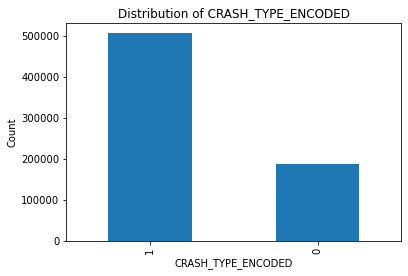

In [ ]:
# Visualize the distribution of the target variable.
y_train.value_counts().plot(kind='bar', title='Distribution of CRASH_TYPE_ENCODED')
plt.xlabel('CRASH_TYPE_ENCODED')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check target class imbalance by the ratio.
imbalance_ratio = y_train.value_counts(normalize=True)
print(imbalance_ratio)

1    0.731442
0    0.268558
Name: CRASH_TYPE_ENCODED, dtype: float64


> The Target dataset has high imbalance which can have a complex implications in our dataset.

#### Independent Variable Analysis

In [ ]:
# Check independent training dataset
X_train_selected

,WEATHER_CONDITION,LIGHTING_CONDITION,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,STREET_NO,STREET_NAME,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
212995,CLEAR,DAWN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",8700,ABERDEEN ST,2,6,7,9
407508,CLEAR,DUSK,STRAIGHT AND LEVEL,WET,NO DEFECTS,"OVER $1,500",1200,CICERO AVE,2,3,7,1
38450,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,"OVER $1,500",1216,HOLLYWOOD AVE,2,14,1,1
104223,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",1800,HASTINGS ST,2,13,3,9
442570,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,UNKNOWN,$500 OR LESS,4701,KEDZIE AVE,2,18,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
259178,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,$500 OR LESS,8900,JEFFERY BLVD,2,15,4,9
365838,CLEAR,"DARKNESS, LIGHTED ROAD",STRAIGHT AND LEVEL,WET,NO DEFECTS,"$501 - $1,500",2007,71ST ST,1,3,2,4
131932,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"$501 - $1,500",800,BLACKHAWK ST,2,8,3,5
671155,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",735,STATE ST,3,19,7,12


In [ ]:
# Determine the mode and count of unique values 
for col in X_train_selected:
    mode = X_train_selected[col].mode()[0]
    unique_vals = X_train_selected[col].nunique()
    print(f'{col}: Mode = {mode}, Unique Values = {unique_vals}')

WEATHER_CONDITION: Mode = CLEAR, Unique Values = 12
LIGHTING_CONDITION: Mode = DAYLIGHT, Unique Values = 6
ALIGNMENT: Mode = STRAIGHT AND LEVEL, Unique Values = 6
ROADWAY_SURFACE_COND: Mode = DRY, Unique Values = 7
ROAD_DEFECT: Mode = NO DEFECTS, Unique Values = 7
DAMAGE: Mode = OVER $1,500, Unique Values = 3
STREET_NO: Mode = 1600, Unique Values = 11559
STREET_NAME: Mode = WESTERN AVE, Unique Values = 1617
NUM_UNITS: Mode = 2, Unique Values = 17
CRASH_HOUR: Mode = 15, Unique Values = 24
CRASH_DAY_OF_WEEK: Mode = 6, Unique Values = 7
CRASH_MONTH: Mode = 7, Unique Values = 12


> As Noted all categorical features identified by object and numerical identified by int64. analysis was done for numerical and categorical features to identify distribution, correlation and outliers for numerical and how each feature can be encoded to get optimal model output

##### Numerical Features

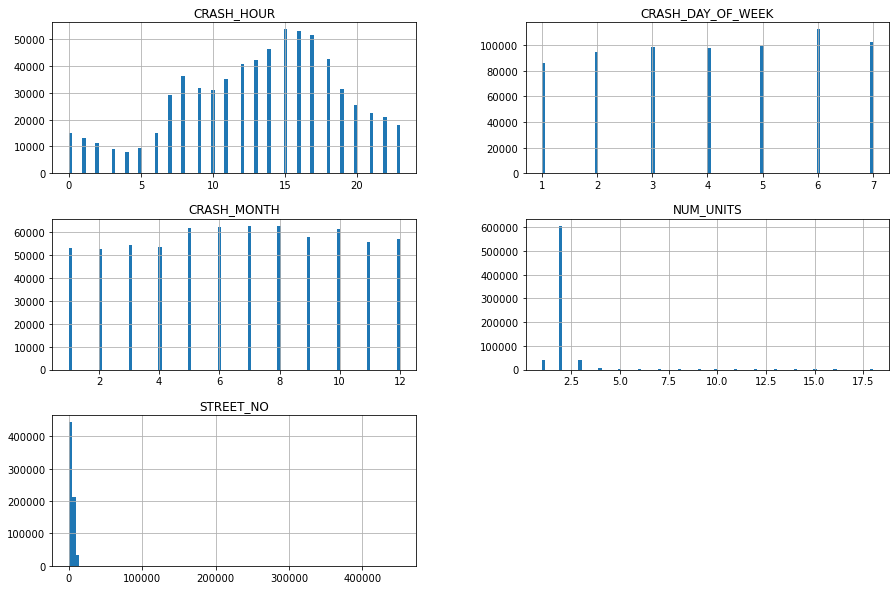

In [ ]:
# Identify the distribution
numerical_columns = [ 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'NUM_UNITS','STREET_NO']

X_train_selected[numerical_columns].hist(bins=100, figsize=(15, 10))
plt.show()

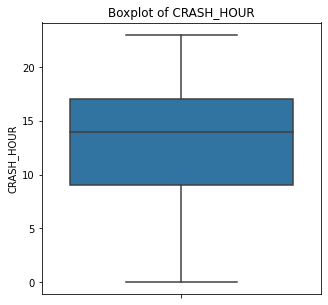

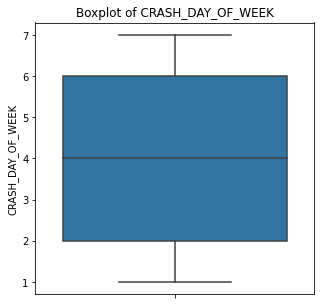

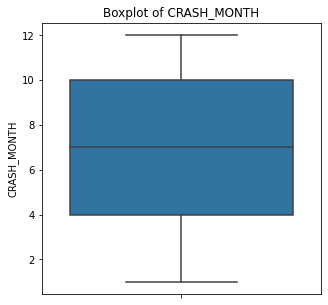

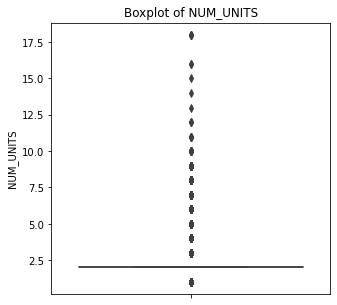

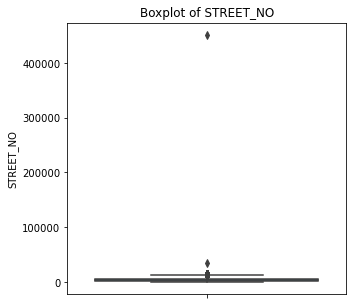

In [ ]:
# Identify the outliers
for col in numerical_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=X_train_selected[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

> Ouliers identified in NUM_STREETS AND STREET_NO due to the high cardinalty in these columns

In [ ]:
# Identify percentage distribution of each unique values
for col in numerical_columns:
    print(X_train_selected[col].value_counts(normalize=True) * 100)

15    7.754845
16    7.649958
17    7.436289
14    6.677122
18    6.132634
13    6.080984
12    5.878279
8     5.249247
11    5.070203
9     4.596265
19    4.544904
10    4.509412
7     4.190568
20    3.659353
21    3.273133
22    3.032485
23    2.610052
0     2.175933
6     2.164102
1     1.874690
2     1.607784
5     1.371464
3     1.303367
4     1.156929
Name: CRASH_HOUR, dtype: float64
6    16.227306
7    14.851514
5    14.343527
3    14.220029
4    14.181363
2    13.730509
1    12.445753
Name: CRASH_DAY_OF_WEEK, dtype: float64
7     9.035272
8     9.019402
6     8.969628
5     8.914804
10    8.853920
9     8.345933
12    8.184491
11    8.008189
3     7.820345
4     7.670733
1     7.623700
2     7.553583
Name: CRASH_MONTH, dtype: float64
2     87.542705
3      5.514277
1      5.497542
4      1.061997
5      0.261279
6      0.074878
7      0.026691
8      0.011109
9      0.004761
10     0.002020
11     0.000866
18     0.000721
12     0.000433
16     0.000289
13     0.000144
14     0

In [ ]:
# Identify occurrences in unique values
for col in numerical_columns:
    print(X_train_selected[col].value_counts())

# features with high cardinalty could be viewed easily by creating a csv file with the column
# We can create a csv file to view the columns with high cardinality
# X_train_selected['STREET_NO'].value_counts().to_csv('street_no_train_counts.csv') 

15    53751
16    53024
17    51543
14    46281
18    42507
13    42149
12    40744
8     36384
11    35143
9     31858
19    31502
10    31256
7     29046
20    25364
21    22687
22    21019
23    18091
0     15082
6     15000
1     12994
2     11144
5      9506
3      9034
4      8019
Name: CRASH_HOUR, dtype: int64
6    112476
7    102940
5     99419
3     98563
4     98295
2     95170
1     86265
Name: CRASH_DAY_OF_WEEK, dtype: int64
7     62626
8     62516
6     62171
5     61791
10    61369
9     57848
12    56729
11    55507
3     54205
4     53168
1     52842
2     52356
Name: CRASH_MONTH, dtype: int64
2     606783
3      38221
1      38105
4       7361
5       1811
6        519
7        185
8         77
9         33
10        14
11         6
18         5
12         3
16         2
13         1
14         1
15         1
Name: NUM_UNITS, dtype: int64
1600     4421
100      4135
800      4024
200      3886
2400     3421
         ... 
6896        1
8897        1
11169       1
13507 

##### Steps taken for numerical data

**STREET_NO**
* This column has high cardinalty with outliers and over    11000 unique values. We will work with our models as is for this column and see how it will affect our model and how we can adjust feature for optimal output

**NUM_UNITS**
* this column contains number of units in a crash. As I believe to impact the predictive nature of our models, though it contains outliers
* use the values as is for the baseline Logistic Regression Model and initial decision tree and Gradient Descent Models
* `Binning`: This will be used in the 1st iterations of Logistic regression, Decision Tree and Gradient Descent.For the Bin we will use `1,2,3, and >3` as for our analysis since the data is left skewed

**CRASH_HOUR**
* for this is hour itself represents numerical values it can remain as is for all iterations.

**CRASH_DAY_OF_WEEK** & **CRASH_MONTH**
* As the format is interger we can use `maping` in model representation to explore results of modelling, but like the hour column we will use as is for analysis


##### Encoding Numerical features

In [ ]:
# Independent training dataset data types
X_train_selected.dtypes

WEATHER_CONDITION       object
LIGHTING_CONDITION      object
ALIGNMENT               object
ROADWAY_SURFACE_COND    object
ROAD_DEFECT             object
DAMAGE                  object
STREET_NO                int64
STREET_NAME             object
NUM_UNITS                int64
CRASH_HOUR               int64
CRASH_DAY_OF_WEEK        int64
CRASH_MONTH              int64
dtype: object

In [ ]:
# Identify missing values in numerical features 
print(X_train_selected['CRASH_HOUR'].isnull().sum())
print(X_train_selected['CRASH_DAY_OF_WEEK'].isnull().sum())
print(X_train_selected['CRASH_MONTH'].isnull().sum())
print(X_train_selected['NUM_UNITS'].isnull().sum())
print(X_train_selected['STREET_NO'].isnull().sum())

0
0
0
0
0


In [ ]:
# Identify unique values in numerical features 
print(X_train_selected['CRASH_HOUR'].unique())
print(X_train_selected['CRASH_DAY_OF_WEEK'].unique())
print(X_train_selected['CRASH_MONTH'].unique())
print(X_train_selected['NUM_UNITS'].unique())
print(X_train_selected['STREET_NO'].unique())

[ 6  3 14 13 18 16 20 15  5 19 17  8 11  7  1 10 23 21  9 12 22  2  4  0]
[7 1 3 2 6 4 5]
[ 9  1  3  6 10  4  8 11  7  5  2 12]
[ 2  3  4  1  5  6  7 18  9 10 12  8 13 11 16 14 15]
[ 8700  1200  1216 ... 12546  8394 12920]


In [ ]:
# Let's make a copy of the the data for encoding and binning
X_train_encoded = X_train_selected.copy()
X_test_encoded = X_test_selected.copy()

month_mapping = {1:'January', 2:'February', 3:'March', 
                 4:'April', 5:'May', 6:'June',
                 7:'July', 8:'August', 9:'September', 
                 10:'October', 11:'November', 12:'December'}

day_mapping = {1:'Sunday', 
               2:'Monday', 
               3:'Tuesday', 
               4:'Wednesday', 
               5:'Thursday', 
               6:'Friday', 
               7:'Saturday'}

# encode the training dataset
X_train_encoded['CRASH_MONTH'] = X_train_encoded['CRASH_MONTH'].map(month_mapping)
X_train_encoded['CRASH_DAY_OF_WEEK'] = X_train_encoded['CRASH_DAY_OF_WEEK'].map(day_mapping)

# encode the testing dataset
X_test_encoded['CRASH_MONTH'] = X_test_encoded['CRASH_MONTH'].map(month_mapping)
X_test_encoded['CRASH_DAY_OF_WEEK'] = X_test_encoded['CRASH_DAY_OF_WEEK'].map(day_mapping)

bins = [0,1, 2, 3, X_train_selected['NUM_UNITS'].max()]
labels = ['Single Unit', 'Two Units', 'Three Units','Multiple Units']
X_train_encoded['NUM_UNITS_BINNED'] = pd.cut(X_train_encoded['NUM_UNITS'], bins=bins, labels=labels, include_lowest=True)
X_test_encoded['NUM_UNITS_BINNED'] = pd.cut(X_test_encoded['NUM_UNITS'], bins=bins, labels=labels, include_lowest=True)

# Check the results
print(X_train_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693128 entries, 212995 to 121958
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   WEATHER_CONDITION     693128 non-null  object  
 1   LIGHTING_CONDITION    693128 non-null  object  
 2   ALIGNMENT             693128 non-null  object  
 3   ROADWAY_SURFACE_COND  693128 non-null  object  
 4   ROAD_DEFECT           693128 non-null  object  
 5   DAMAGE                693128 non-null  object  
 6   STREET_NO             693128 non-null  int64   
 7   STREET_NAME           693128 non-null  object  
 8   NUM_UNITS             693128 non-null  int64   
 9   CRASH_HOUR            693128 non-null  int64   
 10  CRASH_DAY_OF_WEEK     693128 non-null  object  
 11  CRASH_MONTH           693128 non-null  object  
 12  NUM_UNITS_BINNED      693128 non-null  category
dtypes: category(1), int64(3), object(9)
memory usage: 69.4+ MB
None


In [ ]:
# Encoded training data first 5...
X_train_encoded.head()

,WEATHER_CONDITION,LIGHTING_CONDITION,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,STREET_NO,STREET_NAME,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,NUM_UNITS_BINNED
212995,CLEAR,DAWN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",8700,ABERDEEN ST,2,6,Saturday,September,Two Units
407508,CLEAR,DUSK,STRAIGHT AND LEVEL,WET,NO DEFECTS,"OVER $1,500",1200,CICERO AVE,2,3,Saturday,January,Two Units
38450,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,"OVER $1,500",1216,HOLLYWOOD AVE,2,14,Sunday,January,Two Units
104223,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",1800,HASTINGS ST,2,13,Tuesday,September,Two Units
442570,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,UNKNOWN,$500 OR LESS,4701,KEDZIE AVE,2,18,Saturday,March,Two Units


In [ ]:
# Check missing values in Encoded training data 
X_train_encoded.isnull().sum()

WEATHER_CONDITION       0
LIGHTING_CONDITION      0
ALIGNMENT               0
ROADWAY_SURFACE_COND    0
ROAD_DEFECT             0
DAMAGE                  0
STREET_NO               0
STREET_NAME             0
NUM_UNITS               0
CRASH_HOUR              0
CRASH_DAY_OF_WEEK       0
CRASH_MONTH             0
NUM_UNITS_BINNED        0
dtype: int64

In [ ]:
# Encoded training data columns first 5
print(X_train_encoded['CRASH_DAY_OF_WEEK'].head())
print(X_train_encoded['CRASH_MONTH'].head())
print(X_train_encoded['NUM_UNITS_BINNED'].head())

212995    Saturday
407508    Saturday
38450       Sunday
104223     Tuesday
442570    Saturday
Name: CRASH_DAY_OF_WEEK, dtype: object
212995    September
407508      January
38450       January
104223    September
442570        March
Name: CRASH_MONTH, dtype: object
212995    Two Units
407508    Two Units
38450     Two Units
104223    Two Units
442570    Two Units
Name: NUM_UNITS_BINNED, dtype: category
Categories (4, object): ['Single Unit' < 'Two Units' < 'Three Units' < 'Multiple Units']


In [ ]:
# Encoded testing Dataset data types
X_test_encoded.dtypes

WEATHER_CONDITION         object
LIGHTING_CONDITION        object
ALIGNMENT                 object
ROADWAY_SURFACE_COND      object
ROAD_DEFECT               object
DAMAGE                    object
STREET_NO                  int64
STREET_NAME               object
NUM_UNITS                  int64
CRASH_HOUR                 int64
CRASH_DAY_OF_WEEK         object
CRASH_MONTH               object
NUM_UNITS_BINNED        category
dtype: object

In [ ]:
# Encoded testing Dataset data first 5
X_test_encoded.head()

,WEATHER_CONDITION,LIGHTING_CONDITION,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,STREET_NO,STREET_NAME,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,NUM_UNITS_BINNED
618541,CLEAR,DARKNESS,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",2932,FOSTER AVE,2,4,Saturday,October,Two Units
562247,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"OVER $1,500",1900,LUMBER ST,2,16,Tuesday,October,Two Units
224406,CLEAR,DUSK,STRAIGHT AND LEVEL,DRY,NO DEFECTS,"$501 - $1,500",5636,TROY ST,2,2,Monday,August,Two Units
814994,CLEAR,DAYLIGHT,STRAIGHT AND LEVEL,DRY,UNKNOWN,"$501 - $1,500",10900,WENTWORTH AVE,2,17,Friday,March,Two Units
500910,SNOW,DAYLIGHT,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,"$501 - $1,500",2217,KEDZIE AVE,2,14,Sunday,February,Two Units


> The new X_train_encoded and X_test encoded were created for reference after modelling, we will keep the original selected columns for modelling. 

##### Categorical Features

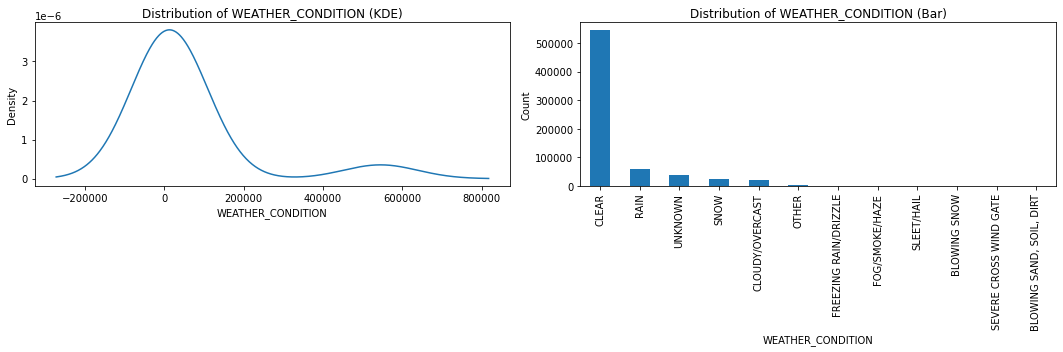

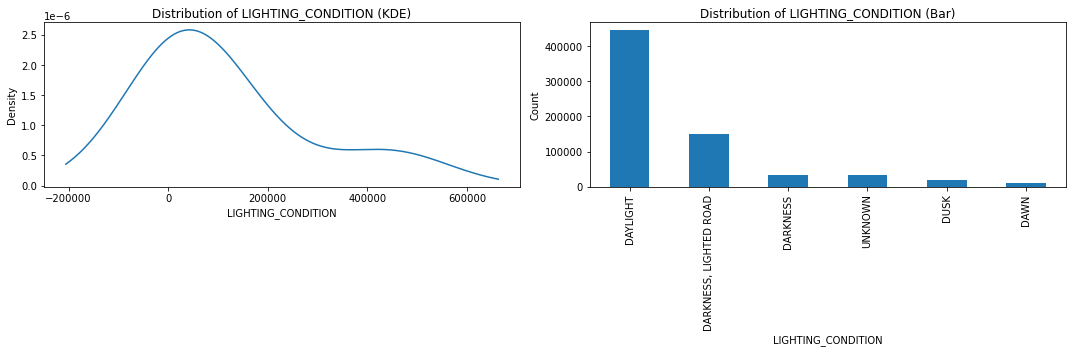

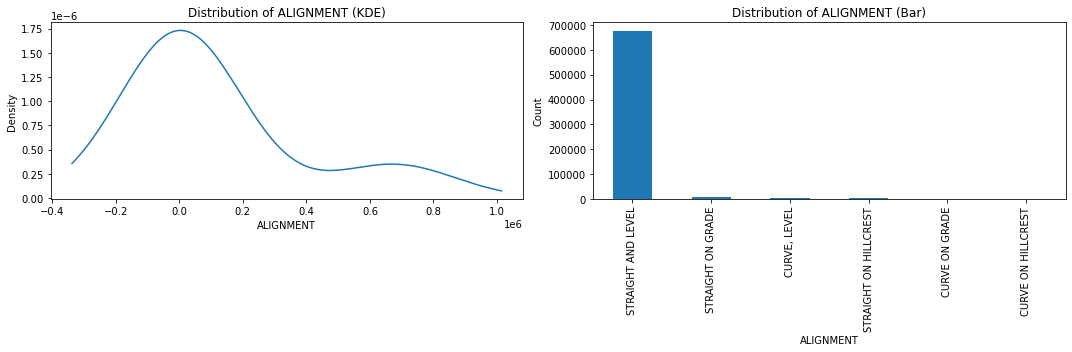

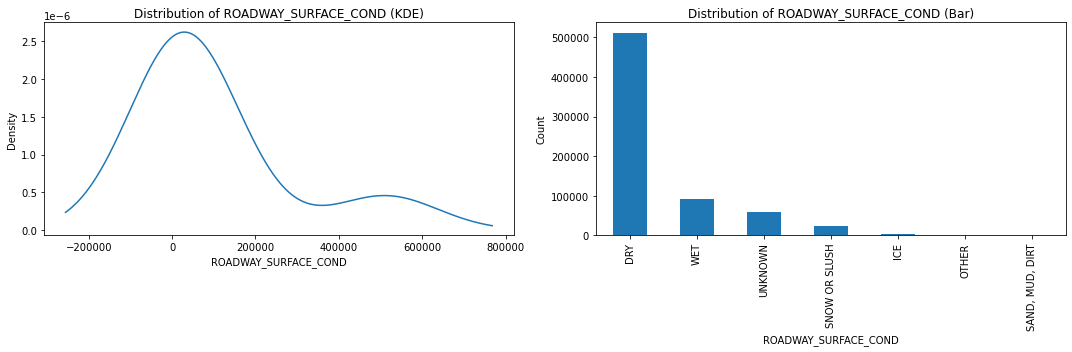

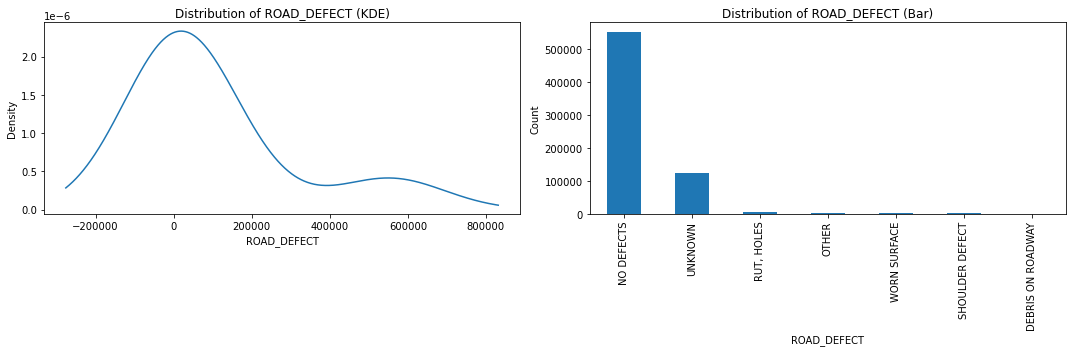

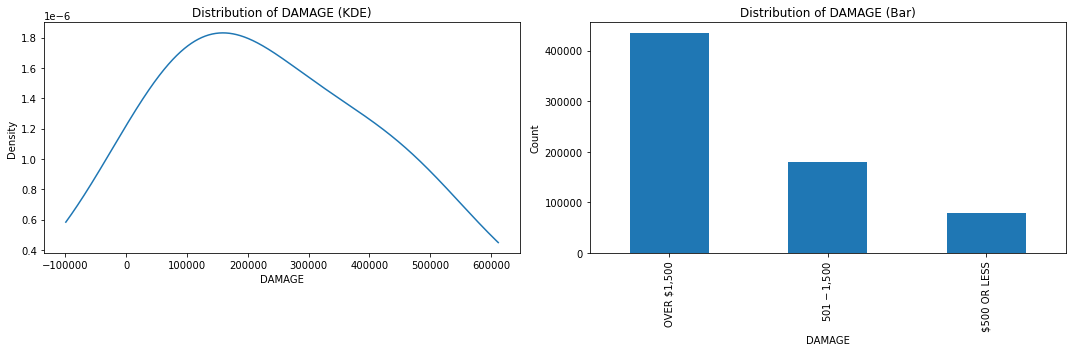

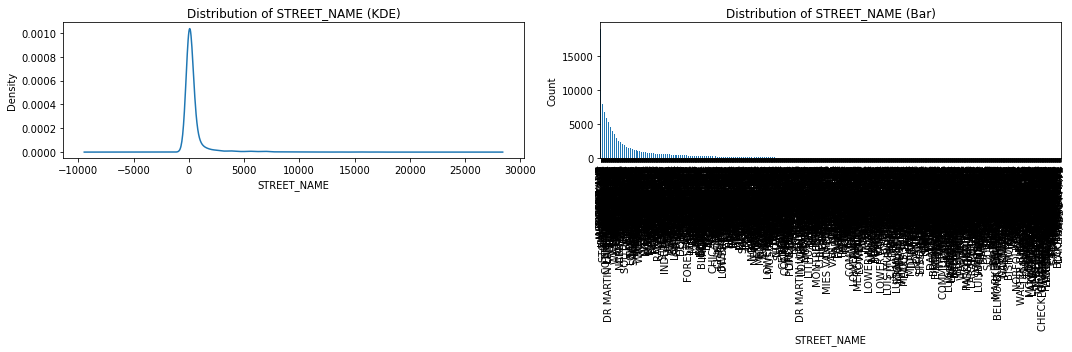

In [ ]:
# Analyze and visualize the distribution of categorical features using bar plots
categorical_columns = ['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE', 'STREET_NAME']

for col in categorical_columns:
  # Create a figure with two subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

  # Plot KDE on the first subplot
  X_train_selected[col].value_counts().plot(kind='kde', ax=ax1)
  ax1.set_title(f'Distribution of {col} (KDE)')
  ax1.set_xlabel(col)
  ax1.set_ylabel('Density')

  # Plot bar chart on the second subplot
  X_train_selected[col].value_counts().plot(kind='bar', ax=ax2)
  ax2.set_title(f'Distribution of {col} (Bar)')
  ax2.set_xlabel(col)
  ax2.set_ylabel('Count')

  # Adjust layout and spacing
  plt.tight_layout()
  plt.show()

In [ ]:
# Examine the frequency percentage of each category within categorical features.
for col in categorical_columns:
    print(X_train_selected[col].value_counts(normalize=True) * 100)

CLEAR                       78.595296
RAIN                         8.721189
UNKNOWN                      5.616856
SNOW                         3.291167
CLOUDY/OVERCAST              2.926155
OTHER                        0.309755
FREEZING RAIN/DRIZZLE        0.197366
FOG/SMOKE/HAZE               0.156681
SLEET/HAIL                   0.117294
BLOWING SNOW                 0.049774
SEVERE CROSS WIND GATE       0.017601
BLOWING SAND, SOIL, DIRT     0.000866
Name: WEATHER_CONDITION, dtype: float64
DAYLIGHT                  64.309478
DARKNESS, LIGHTED ROAD    21.831033
DARKNESS                   4.701440
UNKNOWN                    4.634065
DUSK                       2.850123
DAWN                       1.673861
Name: LIGHTING_CONDITION, dtype: float64
STRAIGHT AND LEVEL       97.611697
STRAIGHT ON GRADE         1.229499
CURVE, LEVEL              0.709104
STRAIGHT ON HILLCREST     0.254354
CURVE ON GRADE            0.151487
CURVE ON HILLCREST        0.043859
Name: ALIGNMENT, dtype: float64
DRY  

In [ ]:
# Independent training dataset data types
X_train_selected.dtypes

WEATHER_CONDITION       object
LIGHTING_CONDITION      object
ALIGNMENT               object
ROADWAY_SURFACE_COND    object
ROAD_DEFECT             object
DAMAGE                  object
STREET_NO                int64
STREET_NAME             object
NUM_UNITS                int64
CRASH_HOUR               int64
CRASH_DAY_OF_WEEK        int64
CRASH_MONTH              int64
dtype: object

In [ ]:
# Value count for categorical columns in selected training datset
for col in categorical_columns:
    print(X_train_selected[col].value_counts())

# features with high cardinalty could be viewed easily by creating a csv file with the column
# We can create a csv file to view the columns with high cardinality
# X_train_selected['STREET_NAME'].value_counts().to_csv('street_name_train_counts.csv')

CLEAR                       544766
RAIN                         60449
UNKNOWN                      38932
SNOW                         22812
CLOUDY/OVERCAST              20282
OTHER                         2147
FREEZING RAIN/DRIZZLE         1368
FOG/SMOKE/HAZE                1086
SLEET/HAIL                     813
BLOWING SNOW                   345
SEVERE CROSS WIND GATE         122
BLOWING SAND, SOIL, DIRT         6
Name: WEATHER_CONDITION, dtype: int64
DAYLIGHT                  445747
DARKNESS, LIGHTED ROAD    151317
DARKNESS                   32587
UNKNOWN                    32120
DUSK                       19755
DAWN                       11602
Name: LIGHTING_CONDITION, dtype: int64
STRAIGHT AND LEVEL       676574
STRAIGHT ON GRADE          8522
CURVE, LEVEL               4915
STRAIGHT ON HILLCREST      1763
CURVE ON GRADE             1050
CURVE ON HILLCREST          304
Name: ALIGNMENT, dtype: int64
DRY                512210
WET                 91467
UNKNOWN             60331
SNOW 

##### Steps taken for categorical data

**STREET_NAME** 
 * This column has high cardinality with the large number of street name identified with accidents, and is skewed to the left. `Frequency encoding` seems to be feasible for this analysis.
 
 **DAMAGE**
 * Since DAMAGE is ordinal, `ordinal encoding` would be appropriate to maintain the natural order.

**ROAD_DEFECT**
* for this column `one hot encoding` will be the most feasible option with this column as well. The data seems skewed with No Defects and unknown taking the most counts followed few rare categories
* For our alternate iteration we will group into 3 rare groups `No Defects, Unknown and Other defects`, for model improvement

**ROADWAY_SURFACE_COND**
 * This feature has no inherent order with dry being a dominate value in the column, with wet also shows having some significant impact compared to snow or lush and unknown.`one hot encoding` seems to be the most feasiable option
 * For our second iteration we could group into 4 rare categories; `Dry, Wet, Unknown and other`, and see the impact on our models

 **ALIGNMENT**
 * Highly imbalaced feature that clould lead to model bias if not addressed.
 * For this column, first, we will `one hot encode` and see how the distribution affects the model.
 * Secondly, we will group into 2 rare categories; `straight and curve`, and check on the 1st iteration of our models.

**LIGHTING_CONDITION**
* For this feature we will use `one hot encoding` for the model instace to view the impact. 
* For the iteration we will also group into 5 categories; `DAYLIGHT,DARKNESS, LIGHTED ROAD DARKNESS, UNKNOWN and Other.`

**WEATHER_CONDITION**
* For this feature we will use `one hot encoding` for the model instace to view the impact. 
* For the iteration we will also group into 6 categories;`CLEAR,RAIN,UNKNOWN,SNOW,OVERCAST and OTHER`

* > Most Features will use `one hot encoding` for analysis, only _STREET NAME_ will use `frequency encoding`, while we will use `ordinal` encoding for the _DAMAGES_ column

* > Most columns have unknown values that has been considered as a category. 

##### Encoding categorical features

In [ ]:
# create a dataset to  encode 
X_train_cat_encoded= X_train_selected.copy()
X_test_cat_encoded = X_test_selected.copy()

# One Hot Encoding for Categorical Features
categorical_ohe_columns = ['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ALIGNMENT',
                       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',]

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

# Fit the data
X_train_encoded = encoder.fit(X_train_cat_encoded[categorical_ohe_columns])

# Transform the test data
X_train_encoded = encoder.transform(X_train_cat_encoded[categorical_ohe_columns]) 
X_test_encoded = encoder.transform(X_test_cat_encoded[categorical_ohe_columns])

# Take column names to use in encoded data
feature_names = []
for col in categorical_ohe_columns:
    feature_names.extend([f"{col}_{val}" for val in encoder.categories_[categorical_ohe_columns.index(col)]])

# Convert to DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train_cat_encoded.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test_cat_encoded.index)


# Concatenate the encoded columns with the original dataframe (excluding the original categorical columns)
X_train_cat_encoded = pd.concat([X_train_cat_encoded.drop(columns=categorical_ohe_columns),
                                  X_train_encoded_df], axis=1)
X_test_cat_encoded = pd.concat([X_test_cat_encoded.drop(columns=categorical_ohe_columns), 
                                 X_test_encoded_df], axis=1)

# Frequency Encoding for 'STREET_NAME'
street_freq = X_train_selected['STREET_NAME'].value_counts(normalize=True)

# Map frequencies to the train and test sets
X_train_cat_encoded['STREET_NAME_FREQ'] = X_train_selected['STREET_NAME'].map(street_freq)
X_test_cat_encoded['STREET_NAME_FREQ'] = X_test_selected['STREET_NAME'].map(street_freq)

# Handle unknown categories by filling NaN with a default value (e.g., 0)
X_train_cat_encoded['STREET_NAME_FREQ'].fillna(0, inplace=True)
X_test_cat_encoded['STREET_NAME_FREQ'].fillna(0, inplace=True)

# Drop the original 'STREET_NAME' column after encoding
X_train_cat_encoded = X_train_cat_encoded.drop(columns=['STREET_NAME'])
X_test_cat_encoded = X_test_cat_encoded.drop(columns=['STREET_NAME'])

# lets also map the damages column
damage_mapping = {'$500 OR LESS': 1, '$501 - $1,500': 2, 'OVER $1,500': 3}
X_train_cat_encoded['DAMAGE'] = X_train_cat_encoded['DAMAGE'].map(damage_mapping)
X_test_cat_encoded['DAMAGE'] = X_test_cat_encoded['DAMAGE'].map(damage_mapping)

# Checking for missing values
print(X_train_cat_encoded.isnull().sum())

DAMAGE                                        0
STREET_NO                                     0
NUM_UNITS                                     0
CRASH_HOUR                                    0
CRASH_DAY_OF_WEEK                             0
CRASH_MONTH                                   0
WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT    0
WEATHER_CONDITION_BLOWING SNOW                0
WEATHER_CONDITION_CLEAR                       0
WEATHER_CONDITION_CLOUDY/OVERCAST             0
WEATHER_CONDITION_FOG/SMOKE/HAZE              0
WEATHER_CONDITION_FREEZING RAIN/DRIZZLE       0
WEATHER_CONDITION_OTHER                       0
WEATHER_CONDITION_RAIN                        0
WEATHER_CONDITION_SEVERE CROSS WIND GATE      0
WEATHER_CONDITION_SLEET/HAIL                  0
WEATHER_CONDITION_SNOW                        0
WEATHER_CONDITION_UNKNOWN                     0
LIGHTING_CONDITION_DARKNESS                   0
LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD     0
LIGHTING_CONDITION_DAWN                 

In [ ]:
# Checking for missing values in encoded testing data
print(X_test_cat_encoded.isnull().sum())

DAMAGE                                        0
STREET_NO                                     0
NUM_UNITS                                     0
CRASH_HOUR                                    0
CRASH_DAY_OF_WEEK                             0
CRASH_MONTH                                   0
WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT    0
WEATHER_CONDITION_BLOWING SNOW                0
WEATHER_CONDITION_CLEAR                       0
WEATHER_CONDITION_CLOUDY/OVERCAST             0
WEATHER_CONDITION_FOG/SMOKE/HAZE              0
WEATHER_CONDITION_FREEZING RAIN/DRIZZLE       0
WEATHER_CONDITION_OTHER                       0
WEATHER_CONDITION_RAIN                        0
WEATHER_CONDITION_SEVERE CROSS WIND GATE      0
WEATHER_CONDITION_SLEET/HAIL                  0
WEATHER_CONDITION_SNOW                        0
WEATHER_CONDITION_UNKNOWN                     0
LIGHTING_CONDITION_DARKNESS                   0
LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD     0
LIGHTING_CONDITION_DAWN                 

In [ ]:
# Checking datatype in encoded training data
X_train_cat_encoded.dtypes

DAMAGE                                          int64
STREET_NO                                       int64
NUM_UNITS                                       int64
CRASH_HOUR                                      int64
CRASH_DAY_OF_WEEK                               int64
CRASH_MONTH                                     int64
WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT    float64
WEATHER_CONDITION_BLOWING SNOW                float64
WEATHER_CONDITION_CLEAR                       float64
WEATHER_CONDITION_CLOUDY/OVERCAST             float64
WEATHER_CONDITION_FOG/SMOKE/HAZE              float64
WEATHER_CONDITION_FREEZING RAIN/DRIZZLE       float64
WEATHER_CONDITION_OTHER                       float64
WEATHER_CONDITION_RAIN                        float64
WEATHER_CONDITION_SEVERE CROSS WIND GATE      float64
WEATHER_CONDITION_SLEET/HAIL                  float64
WEATHER_CONDITION_SNOW                        float64
WEATHER_CONDITION_UNKNOWN                     float64
LIGHTING_CONDITION_DARKNESS 

In [ ]:
# Checking datatype in encoded testing data
X_test_cat_encoded.dtypes

DAMAGE                                          int64
STREET_NO                                       int64
NUM_UNITS                                       int64
CRASH_HOUR                                      int64
CRASH_DAY_OF_WEEK                               int64
CRASH_MONTH                                     int64
WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT    float64
WEATHER_CONDITION_BLOWING SNOW                float64
WEATHER_CONDITION_CLEAR                       float64
WEATHER_CONDITION_CLOUDY/OVERCAST             float64
WEATHER_CONDITION_FOG/SMOKE/HAZE              float64
WEATHER_CONDITION_FREEZING RAIN/DRIZZLE       float64
WEATHER_CONDITION_OTHER                       float64
WEATHER_CONDITION_RAIN                        float64
WEATHER_CONDITION_SEVERE CROSS WIND GATE      float64
WEATHER_CONDITION_SLEET/HAIL                  float64
WEATHER_CONDITION_SNOW                        float64
WEATHER_CONDITION_UNKNOWN                     float64
LIGHTING_CONDITION_DARKNESS 

### Bivariate Analysis

* > We will use the categorical encoded dataset for this analysis. to compare the the analysis i.e X_train_cat_encoded and X_test_cat_encoded 
* > As the Independent univariate feature analysis, we will group the columns to numerical and categorical

In [ ]:
# Add y_train to X_train_encoded for correlation analysis
# lets create a copy of the encoded X_Train
X_train_cat_encodedv1= X_train_cat_encoded.copy()

X_train_cat_encodedv1['target'] = y_train
print(X_train_cat_encodedv1.columns)

Index(['DAMAGE', 'STREET_NO', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT',
       'WEATHER_CONDITION_BLOWING SNOW', 'WEATHER_CONDITION_CLEAR',
       'WEATHER_CONDITION_CLOUDY/OVERCAST', 'WEATHER_CONDITION_FOG/SMOKE/HAZE',
       'WEATHER_CONDITION_FREEZING RAIN/DRIZZLE', 'WEATHER_CONDITION_OTHER',
       'WEATHER_CONDITION_RAIN', 'WEATHER_CONDITION_SEVERE CROSS WIND GATE',
       'WEATHER_CONDITION_SLEET/HAIL', 'WEATHER_CONDITION_SNOW',
       'WEATHER_CONDITION_UNKNOWN', 'LIGHTING_CONDITION_DARKNESS',
       'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 'LIGHTING_CONDITION_DAWN',
       'LIGHTING_CONDITION_DAYLIGHT', 'LIGHTING_CONDITION_DUSK',
       'LIGHTING_CONDITION_UNKNOWN', 'ALIGNMENT_CURVE ON GRADE',
       'ALIGNMENT_CURVE ON HILLCREST', 'ALIGNMENT_CURVE, LEVEL',
       'ALIGNMENT_STRAIGHT AND LEVEL', 'ALIGNMENT_STRAIGHT ON GRADE',
       'ALIGNMENT_STRAIGHT ON HILLCREST', 'ROADWAY_SURFACE_COND_DRY',
      

#### Numerical Features

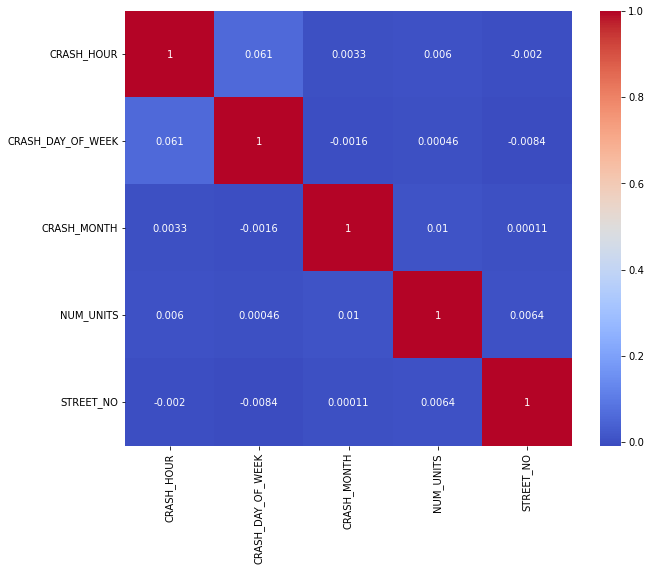

In [ ]:
# let's check the correlation of these numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_cat_encodedv1[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

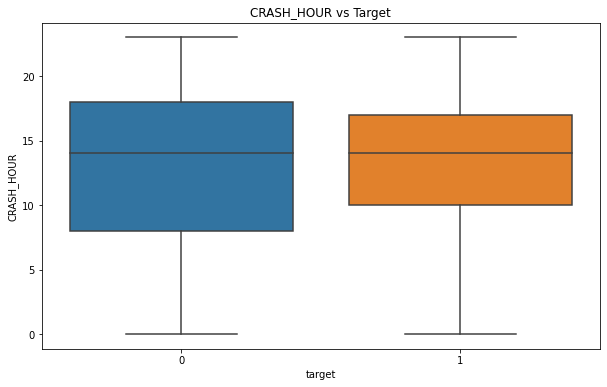

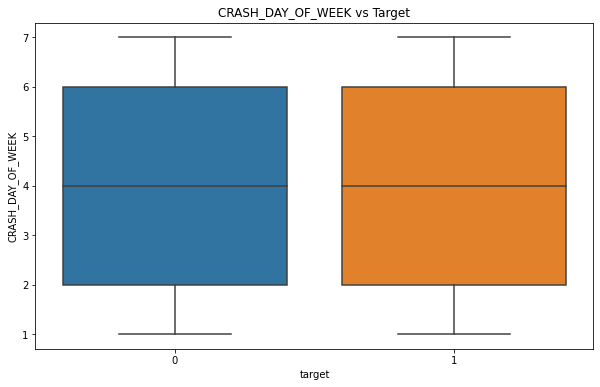

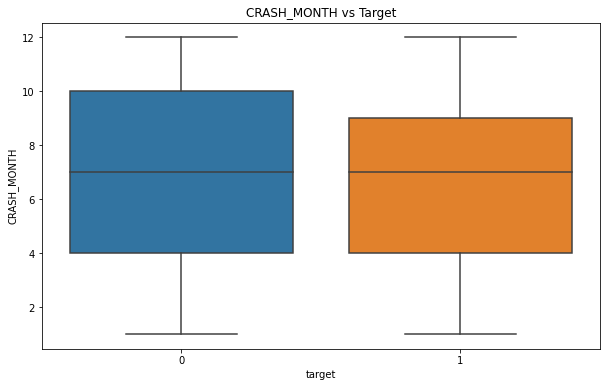

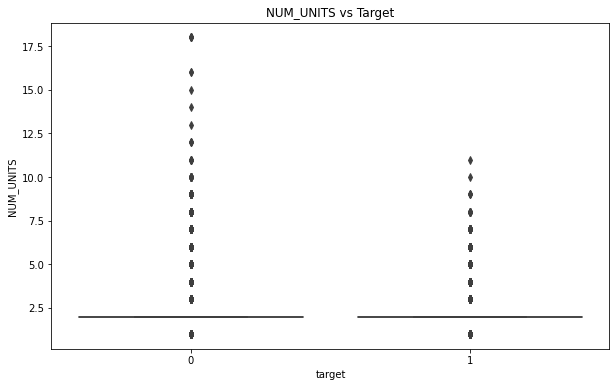

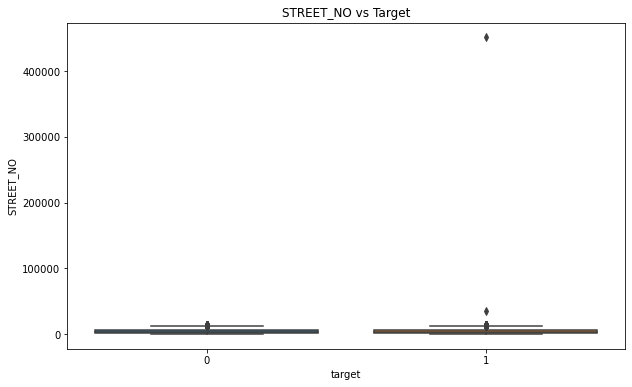

In [ ]:
# Boxplots to compare with target features
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X_train_cat_encodedv1, x='target', y=col)
    plt.title(f'{col} vs Target')
    plt.show()

In [ ]:
# ANOVA test for each numerical feature
for col in numerical_columns:
    groups = [X_train_cat_encodedv1[X_train_cat_encodedv1['target'] == i]
              [col] for i in X_train_cat_encodedv1['target'].unique()]
    f_stat, p_value = f_oneway(*groups)

    print(f'ANOVA test for {col}: p-value = {p_value}')

ANOVA test for CRASH_HOUR: p-value = 0.0
ANOVA test for CRASH_DAY_OF_WEEK: p-value = 2.1576939558625066e-18
ANOVA test for CRASH_MONTH: p-value = 1.0752844601163475e-24
ANOVA test for NUM_UNITS: p-value = 0.0
ANOVA test for STREET_NO: p-value = 7.029069156186773e-76


#### Categorical Features

In [ ]:
# Lets define the features in our encoded dataframe
ohe_columns = [
       'WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT',
       'WEATHER_CONDITION_BLOWING SNOW', 'WEATHER_CONDITION_CLEAR',
       'WEATHER_CONDITION_CLOUDY/OVERCAST', 'WEATHER_CONDITION_FOG/SMOKE/HAZE',
       'WEATHER_CONDITION_FREEZING RAIN/DRIZZLE', 'WEATHER_CONDITION_OTHER',
       'WEATHER_CONDITION_RAIN', 'WEATHER_CONDITION_SEVERE CROSS WIND GATE',
       'WEATHER_CONDITION_SLEET/HAIL', 'WEATHER_CONDITION_SNOW',
       'WEATHER_CONDITION_UNKNOWN', 'LIGHTING_CONDITION_DARKNESS',
       'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 'LIGHTING_CONDITION_DAWN',
       'LIGHTING_CONDITION_DAYLIGHT', 'LIGHTING_CONDITION_DUSK',
       'LIGHTING_CONDITION_UNKNOWN', 'ALIGNMENT_CURVE ON GRADE',
       'ALIGNMENT_CURVE ON HILLCREST', 'ALIGNMENT_CURVE, LEVEL',
       'ALIGNMENT_STRAIGHT AND LEVEL', 'ALIGNMENT_STRAIGHT ON GRADE',
       'ALIGNMENT_STRAIGHT ON HILLCREST', 'ROADWAY_SURFACE_COND_DRY',
       'ROADWAY_SURFACE_COND_ICE', 'ROADWAY_SURFACE_COND_OTHER',
       'ROADWAY_SURFACE_COND_SAND, MUD, DIRT',
       'ROADWAY_SURFACE_COND_SNOW OR SLUSH', 'ROADWAY_SURFACE_COND_UNKNOWN',
       'ROADWAY_SURFACE_COND_WET', 'ROAD_DEFECT_DEBRIS ON ROADWAY',
       'ROAD_DEFECT_NO DEFECTS', 'ROAD_DEFECT_OTHER', 'ROAD_DEFECT_RUT, HOLES',
       'ROAD_DEFECT_SHOULDER DEFECT', 'ROAD_DEFECT_UNKNOWN',
       'ROAD_DEFECT_WORN SURFACE','target']
     

In [ ]:
# Calculate mean of target variable for each category
for col in ohe_columns:
    print(f'\nMean of target by {col}:')
    print(X_train_cat_encodedv1.groupby(col)['target'].mean())


Mean of target by CRASH_MONTH:
CRASH_MONTH
1     0.735608
2     0.754909
3     0.739212
4     0.731417
5     0.733036
6     0.728587
7     0.722240
8     0.726358
9     0.728997
10    0.726165
11    0.729674
12    0.725590
Name: target, dtype: float64

Mean of target by WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT:
WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT
0.0    0.731441
1.0    0.833333
Name: target, dtype: float64

Mean of target by WEATHER_CONDITION_BLOWING SNOW:
WEATHER_CONDITION_BLOWING SNOW
0.0    0.731500
1.0    0.614493
Name: target, dtype: float64

Mean of target by WEATHER_CONDITION_CLEAR:
WEATHER_CONDITION_CLEAR
0.0    0.732849
1.0    0.731059
Name: target, dtype: float64

Mean of target by WEATHER_CONDITION_CLOUDY/OVERCAST:
WEATHER_CONDITION_CLOUDY/OVERCAST
0.0    0.732423
1.0    0.698896
Name: target, dtype: float64

Mean of target by WEATHER_CONDITION_FOG/SMOKE/HAZE:
WEATHER_CONDITION_FOG/SMOKE/HAZE
0.0    0.731606
1.0    0.627072
Name: target, dtype: float64

Mean of tar

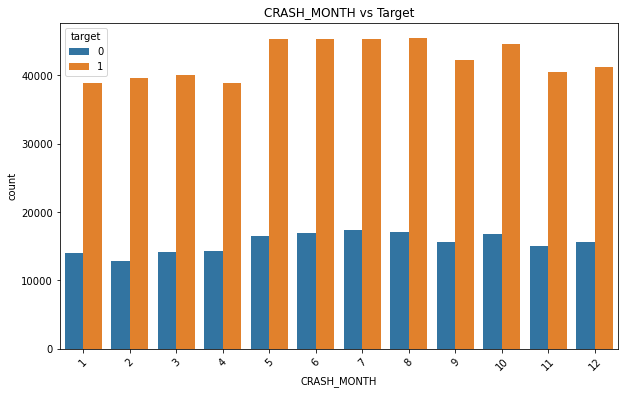

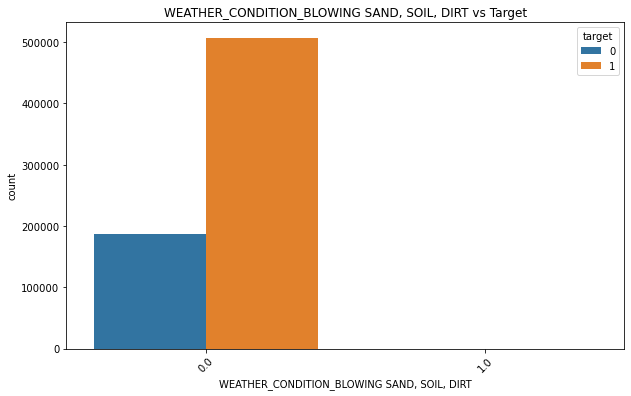

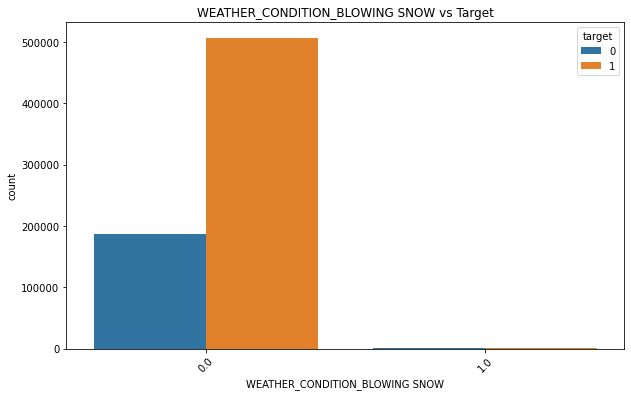

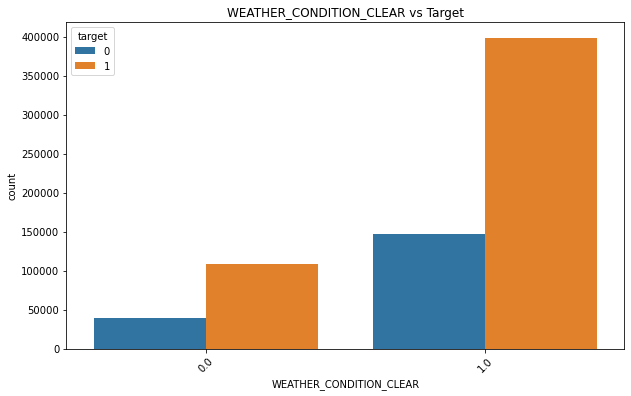

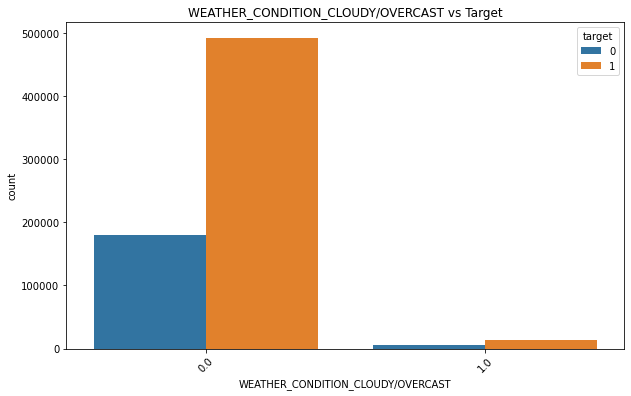

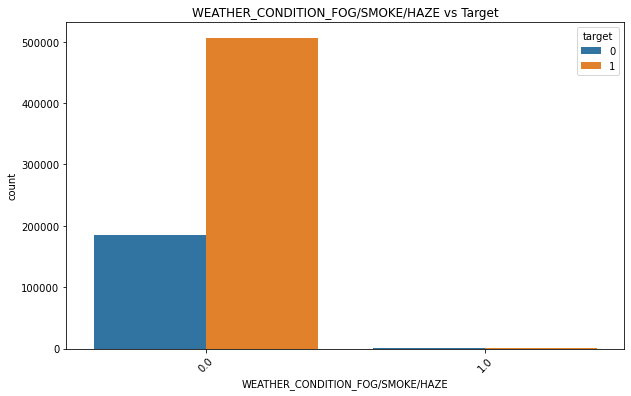

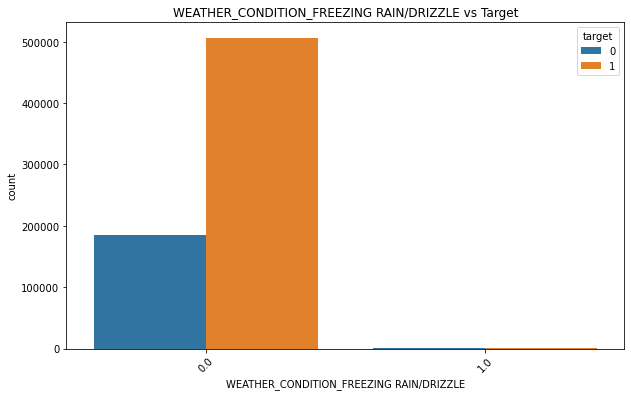

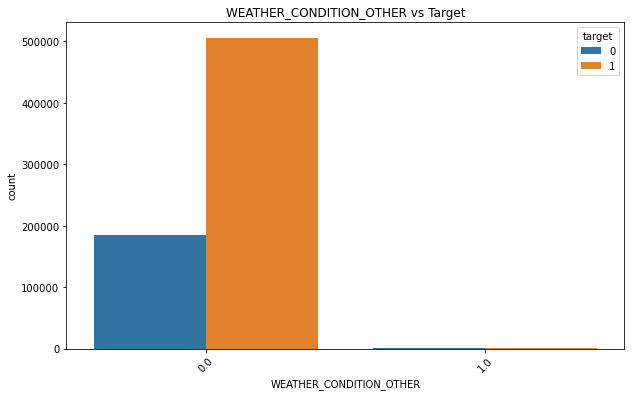

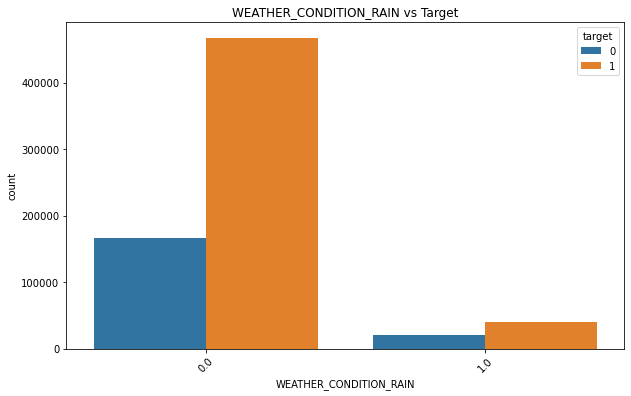

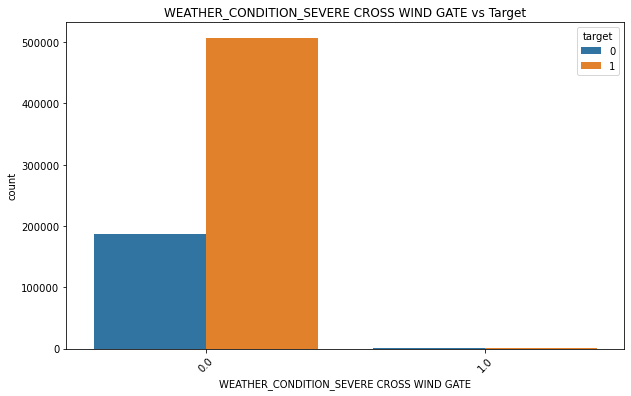

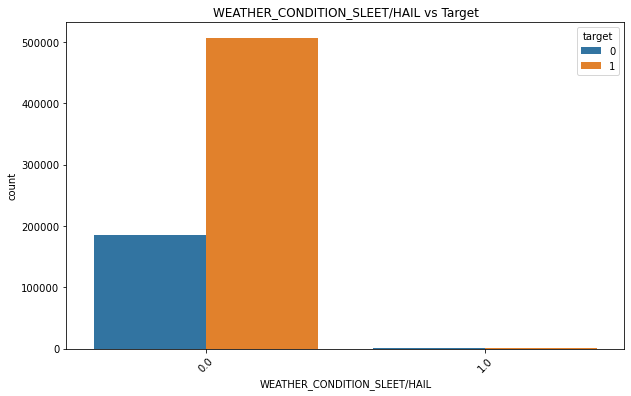

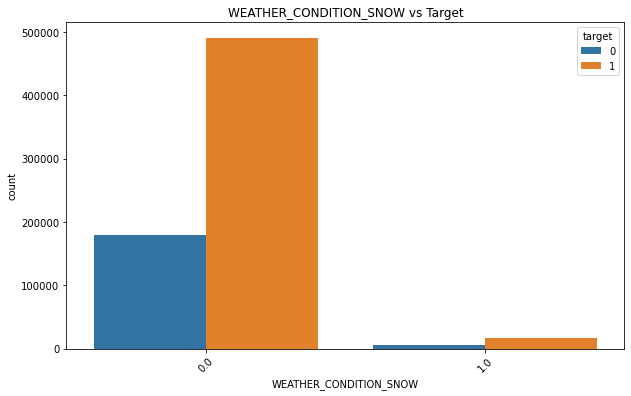

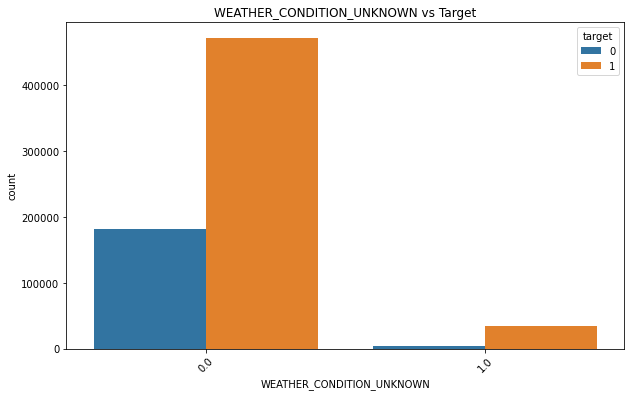

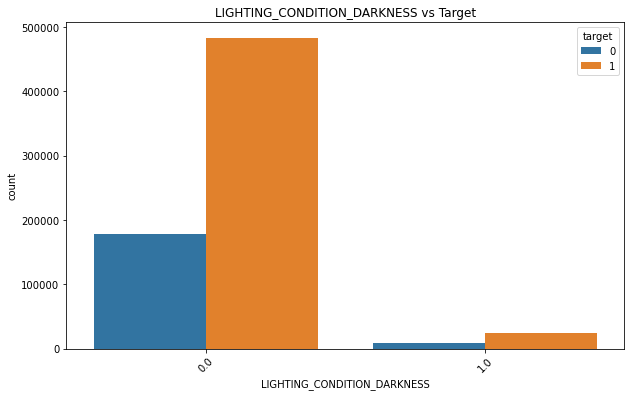

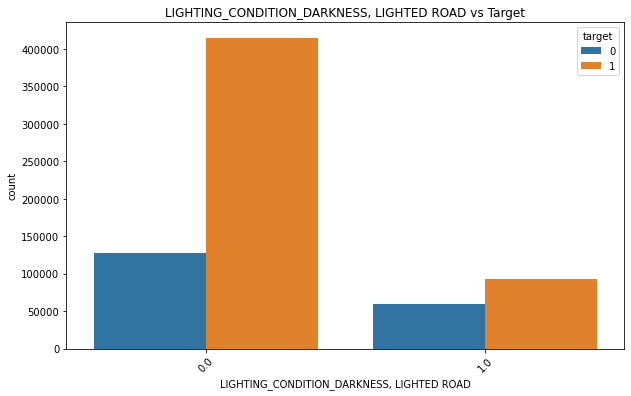

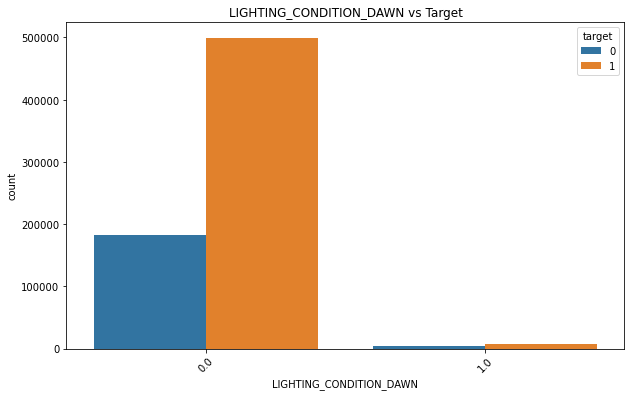

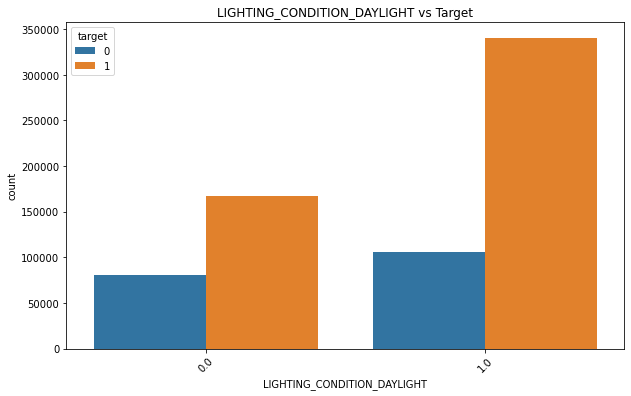

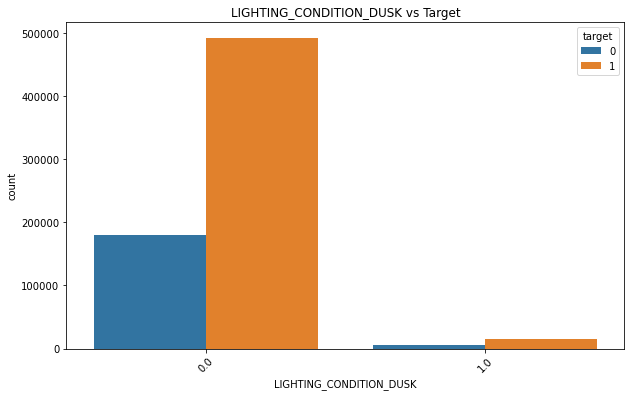

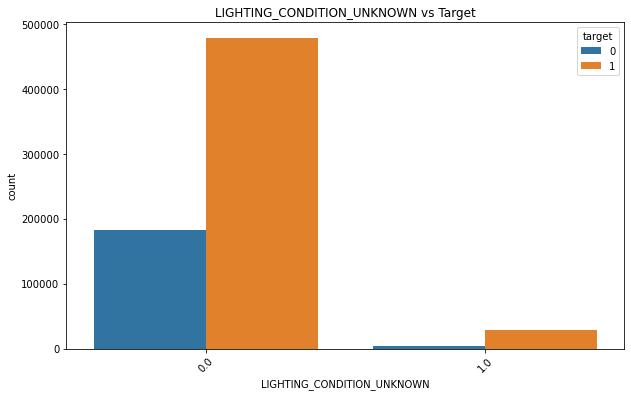

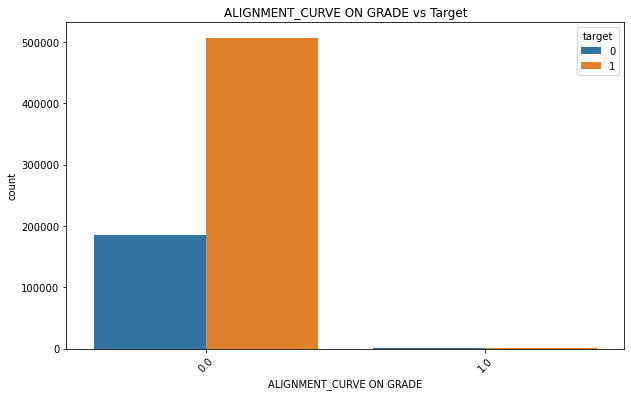

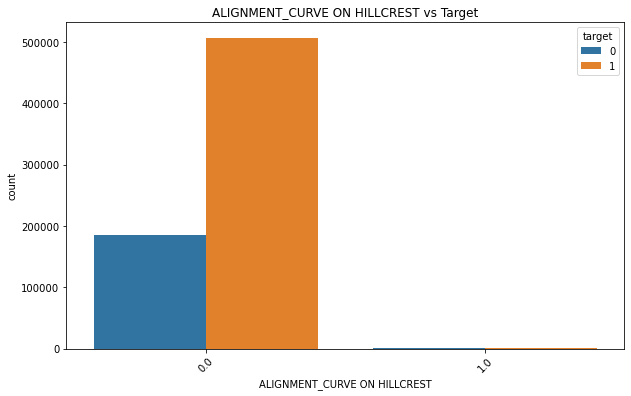

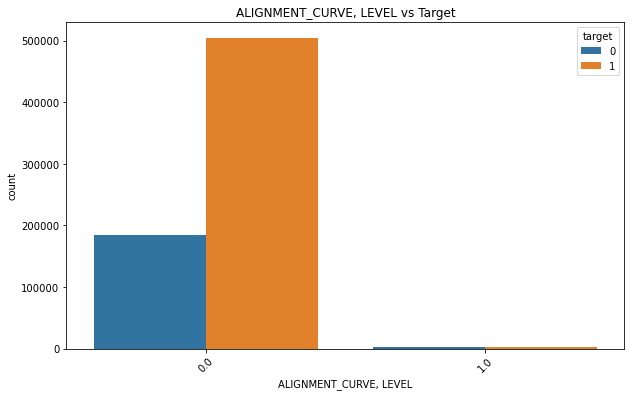

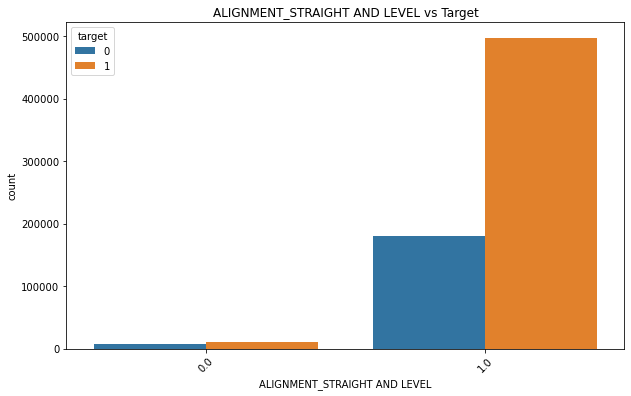

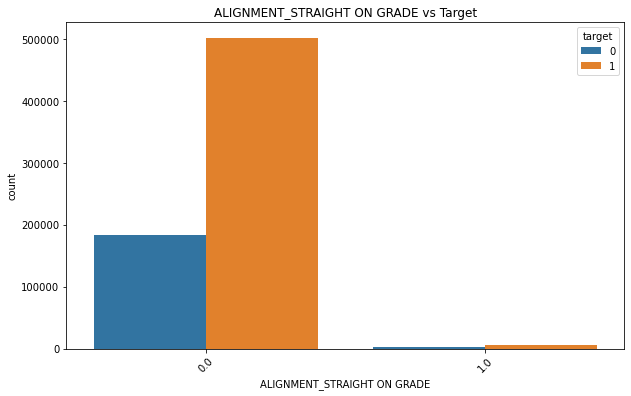

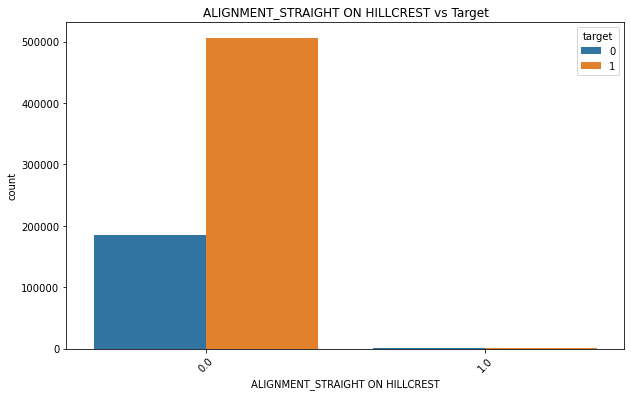

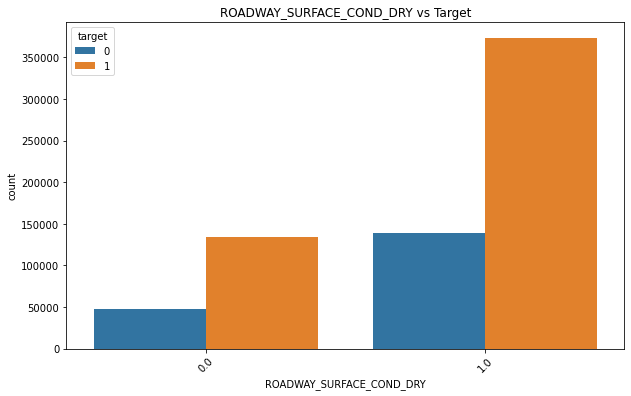

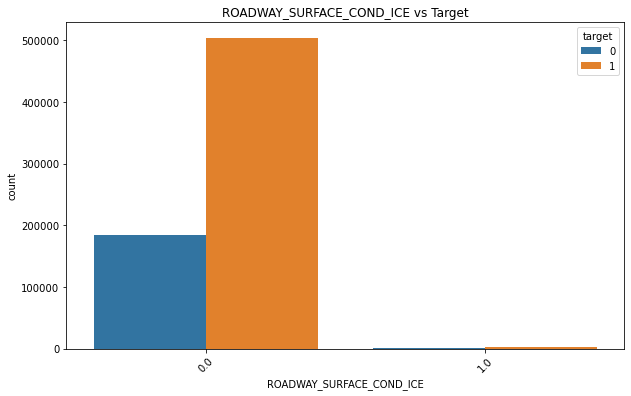

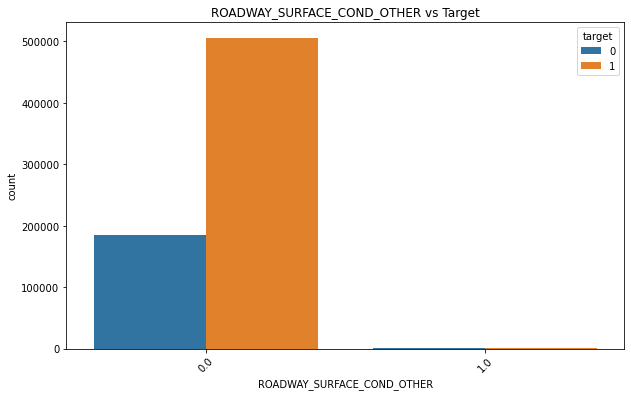

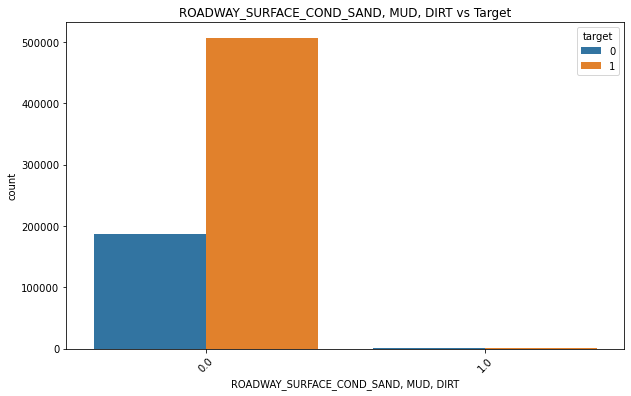

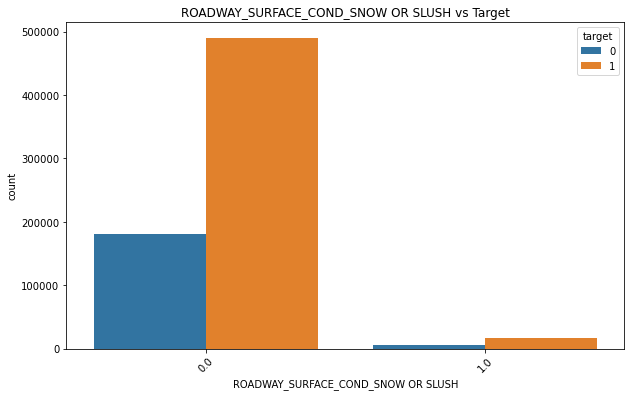

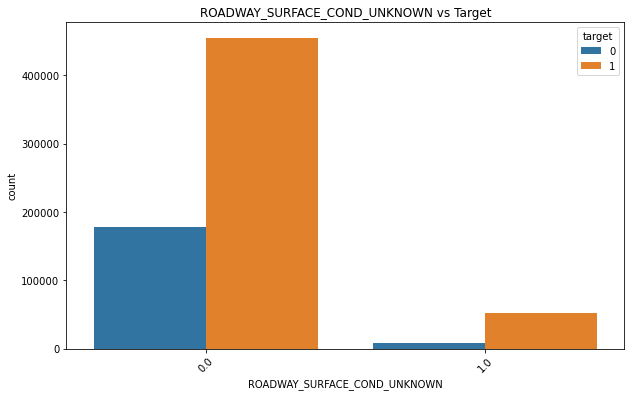

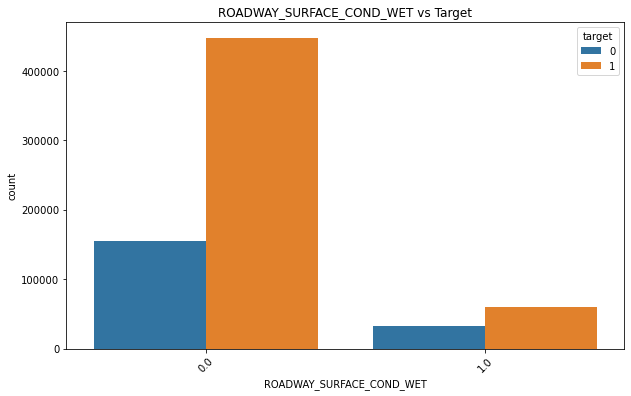

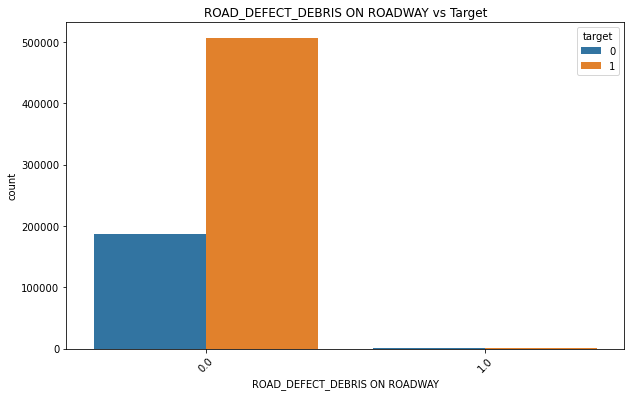

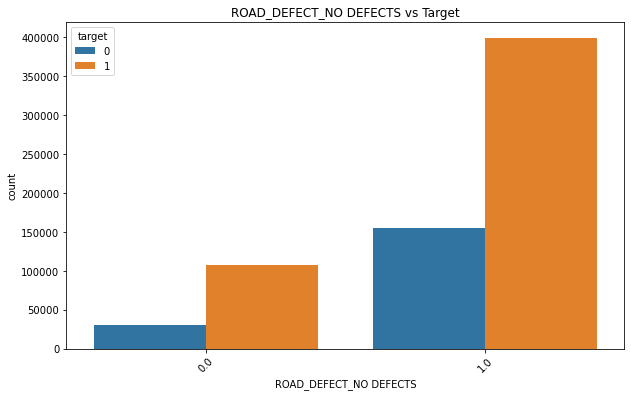

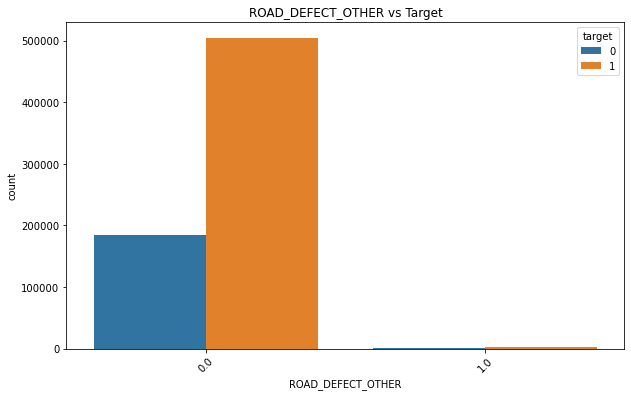

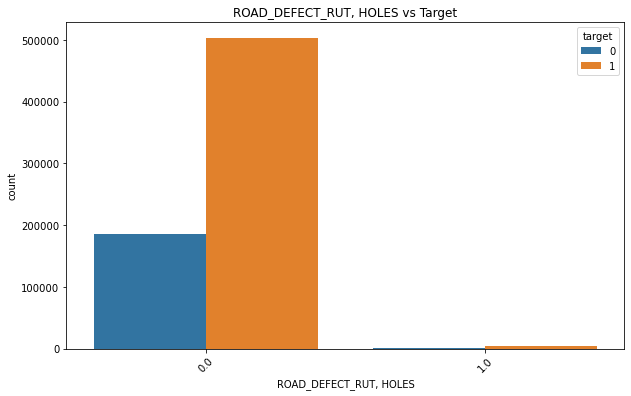

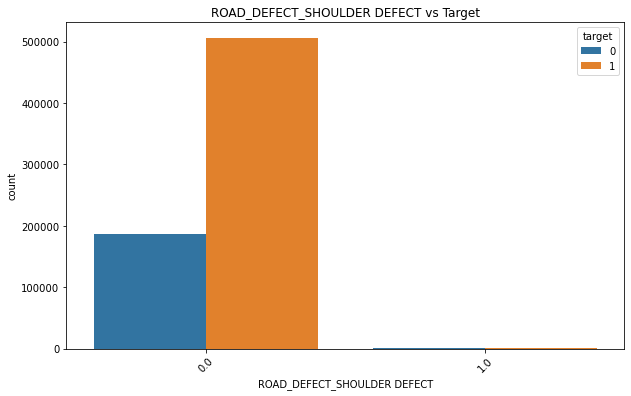

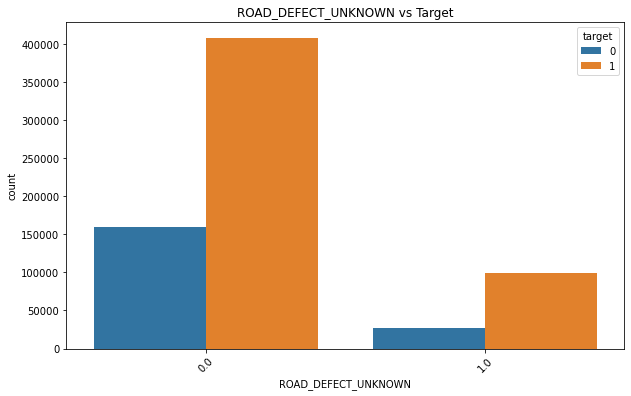

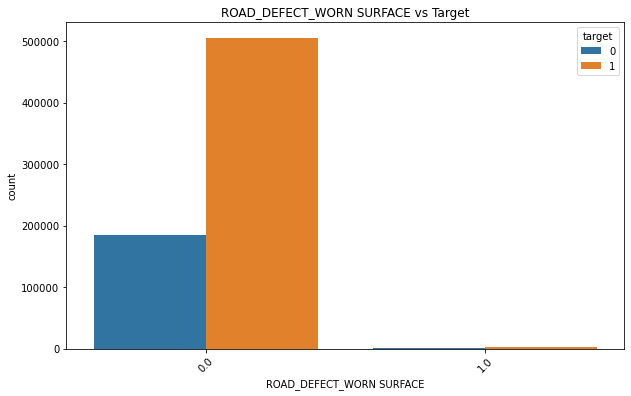

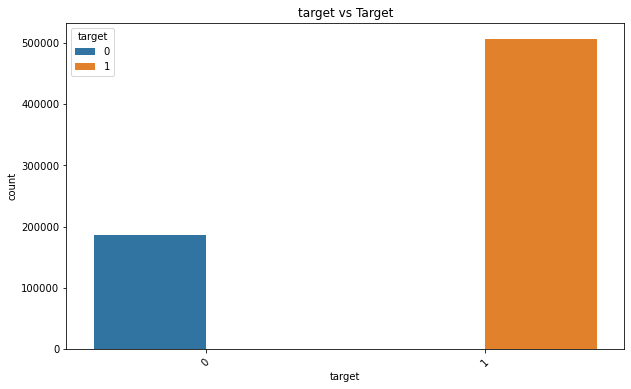

In [ ]:
# Plot target distribution for categorical features
for col in ohe_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=X_train_cat_encodedv1, x=col, hue='target')
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Final training dataset for initial modeling
X_train_cat_encoded

,DAMAGE,STREET_NO,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,"WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT",WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,ALIGNMENT_CURVE ON GRADE,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,STREET_NAME_FREQ
212995,3,8700,2,6,7,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000932
407508,3,1200,2,3,7,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.022351
38450,3,1216,2,14,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000983
104223,3,1800,2,13,3,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000105
442570,1,4701,2,18,7,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.017339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1,8900,2,15,4,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.003162
365838,2,2007,1,3,2,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.005341
131932,2,800,2,8,3,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000163
671155,3,735,3,19,7,12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.011421


In [ ]:
# Final Testing data for modeling
X_test_cat_encoded

,DAMAGE,STREET_NO,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,"WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT",WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,ALIGNMENT_CURVE ON GRADE,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,STREET_NAME_FREQ
618541,3,2932,2,4,7,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.005654
562247,3,1900,2,16,3,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000072
224406,2,5636,2,2,2,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000988
814994,2,10900,2,17,6,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.005138
500910,2,2217,2,14,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.017339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549773,3,1600,3,22,5,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.004185
125999,3,5500,2,16,5,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000648
68850,3,5510,3,11,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.005207
87286,3,2256,1,17,3,12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000557


# Data Modeling

# Questions to consider:
***
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Steps taken

1. define a pipeline
2. instatiate scaler for numerical values i.e int64
3. identify features to scale
4. Handle target imbalance
5. Initialize models
6. Results

> + we will use a pipeline to hanle the steps suggested above.
> + for the baseline model, `Logistic regression` with `random_state` and Standard scaler to be used
> + The second iteration, will run the model with each remaining scaler and check the performance
> + For the final iteration in this model will use parameter `(fit_intercept=False, C=1e12, solver='liblinear')` for anlysis with all scaler and compare the perfomance 

## Pipeline

In [ ]:
 # Define the function to create a pipeline 
def create_pipeline(scaler_name, model):
    # Choose the scaler
    scaler = {
        'MinMaxScaler': MinMaxScaler(),
        'StandardScaler': StandardScaler(),
        'RobustScaler': RobustScaler(),
        'MaxAbsScaler': MaxAbsScaler()
    }[scaler_name]

    # List of scaled features
    scaled_features=['DAMAGE', 'STREET_NO', 
                    'NUM_UNITS', 'CRASH_HOUR', 
                    'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']


    # Define the transformers
    preprocessor = make_column_transformer(
        (scaler, scaled_features),
        remainder='passthrough'
    )

    # RandomUnderSampler to handle class imbalance
    undersampler = RandomUnderSampler(random_state=42)

    # Create pipeline using ImbPipeline from imblearn
    pipeline = ImbPipeline(steps=[
        ('undersampler', undersampler),
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    return pipeline


## BaseLine Model - Logistic Regression

In [ ]:
# Instantiate a Logistic Regression model
baseline_model = LogisticRegression(random_state=42)

# List of scalers to test
scalers = ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler']

# Initialize lists to store metrics
scaler_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

# Iterate through each scaler
for scaler_name in scalers:
    # Create pipeline with the current scaler
    pipeline = create_pipeline(scaler_name, baseline_model)
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train_cat_encoded, y_train)
    
    # Predict on the test set
    predictions = pipeline.predict(X_test_cat_encoded)
    
    # Evaluate the model with the current scaler
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    # Store metrics
    scaler_names.append(scaler_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

### Visualize results

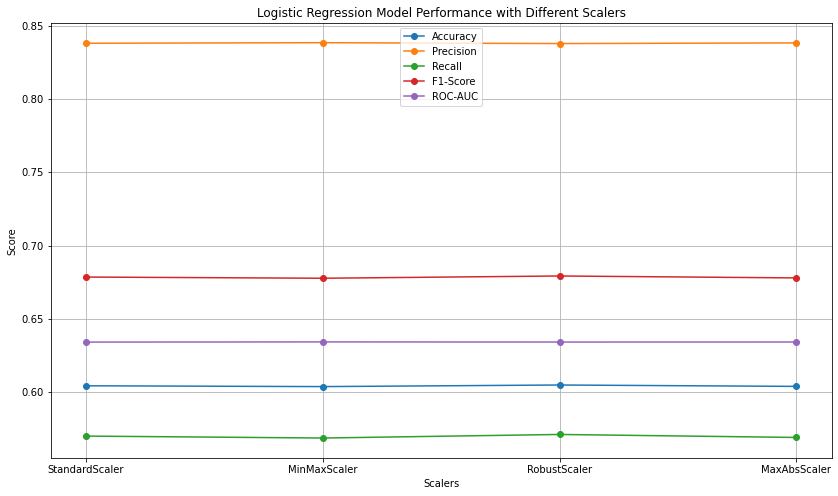

In [ ]:
# Visualize the results
plt.figure(figsize=(14, 8))
plt.plot(scaler_names, accuracies, marker='o', label='Accuracy')
plt.plot(scaler_names, precisions, marker='o', label='Precision')
plt.plot(scaler_names, recalls, marker='o', label='Recall')
plt.plot(scaler_names, f1_scores, marker='o', label='F1-Score')
plt.plot(scaler_names, roc_aucs, marker='o', label='ROC-AUC')
plt.xlabel('Scalers')
plt.ylabel('Score')
plt.title('Logistic Regression Model Performance with Different Scalers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Decision Tree Model

In [ ]:
# Instantiate a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize lists to store metrics
dt_accuracies = []
dt_precisions = []
dt_recalls = []
dt_f1_scores = []
dt_roc_aucs = []

# Iterate through each scaler
for scaler_name in scalers:
    # Create pipeline with the current scaler
    pipeline = create_pipeline(scaler_name, dt_model)
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train_cat_encoded, y_train)
    
    # Predict on the test set
    predictions = pipeline.predict(X_test_cat_encoded)
    
    # Evaluate the model with the current scaler
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    
    # Store metrics
    dt_accuracies.append(accuracy)
    dt_precisions.append(precision)
    dt_recalls.append(recall)
    dt_f1_scores.append(f1)
    dt_roc_aucs.append(roc_auc)

##3 Visualize results

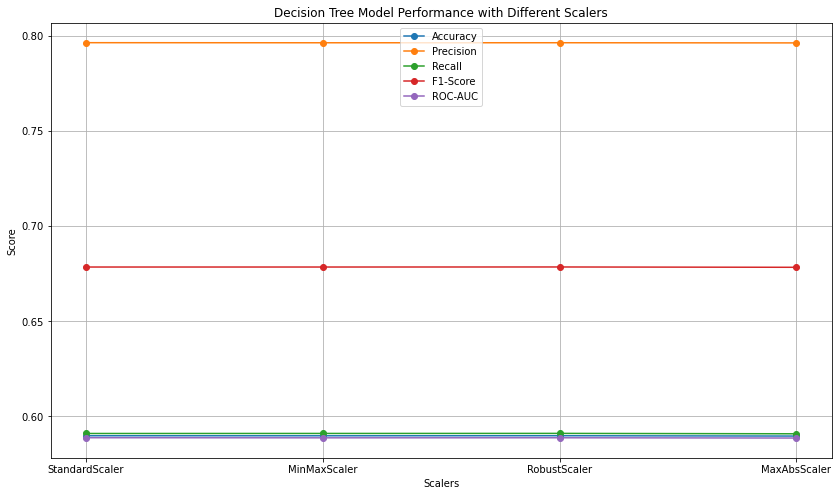

In [ ]:
# Visualize the results
plt.figure(figsize=(14, 8))
plt.plot(scaler_names, dt_accuracies, marker='o', label='Accuracy')
plt.plot(scaler_names, dt_precisions, marker='o', label='Precision')
plt.plot(scaler_names, dt_recalls, marker='o', label='Recall')
plt.plot(scaler_names, dt_f1_scores, marker='o', label='F1-Score')
plt.plot(scaler_names, dt_roc_aucs, marker='o', label='ROC-AUC')
plt.xlabel('Scalers')
plt.ylabel('Score')
plt.title('Decision Tree Model Performance with Different Scalers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Evaluation

# Questions to consider:
***
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Visualize Results

In [ ]:
# Define the function to print comparison metrics
def print_metrics_comparison(scaler_name, dt_metrics, lr_metrics):
    dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc = dt_metrics
    lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc = lr_metrics
    
    print(f"\nScaler: {scaler_name}")
    print(f"{'Metric':<12} {'Decision Tree':<18} {'Logistic Regression':<18}")
    print(f"Accuracy    : {dt_accuracy:.4f}              {lr_accuracy:.4f}")
    print(f"Precision   : {dt_precision:.4f}              {lr_precision:.4f}")
    print(f"Recall      : {dt_recall:.4f}              {lr_recall:.4f}")
    print(f"F1-Score    : {dt_f1:.4f}              {lr_f1:.4f}")
    print(f"ROC-AUC     : {dt_roc_auc:.4f}              {lr_roc_auc:.4f}")

# Assuming metrics for Decision Tree and Logistic Regression are already calculated
for i, scaler_name in enumerate(scaler_names):
    dt_metrics = (dt_accuracies[i], dt_precisions[i], dt_recalls[i], dt_f1_scores[i], dt_roc_aucs[i])
    lr_metrics = (accuracies[i], precisions[i], recalls[i], f1_scores[i], roc_aucs[i])
    print_metrics_comparison(scaler_name, dt_metrics, lr_metrics)


Scaler: StandardScaler
Metric       Decision Tree      Logistic Regression
Accuracy    : 0.5898              0.6043
Precision   : 0.7964              0.8380
Recall      : 0.5910              0.5700
F1-Score    : 0.6785              0.6785
ROC-AUC     : 0.5888              0.6341

Scaler: MinMaxScaler
Metric       Decision Tree      Logistic Regression
Accuracy    : 0.5898              0.6038
Precision   : 0.7964              0.8383
Recall      : 0.5910              0.5687
F1-Score    : 0.6785              0.6777
ROC-AUC     : 0.5887              0.6343

Scaler: RobustScaler
Metric       Decision Tree      Logistic Regression
Accuracy    : 0.5898              0.6049
Precision   : 0.7964              0.8378
Recall      : 0.5910              0.5711
F1-Score    : 0.6785              0.6792
ROC-AUC     : 0.5887              0.6342

Scaler: MaxAbsScaler
Metric       Decision Tree      Logistic Regression
Accuracy    : 0.5896              0.6039
Precision   : 0.7963              0.8382
Recal

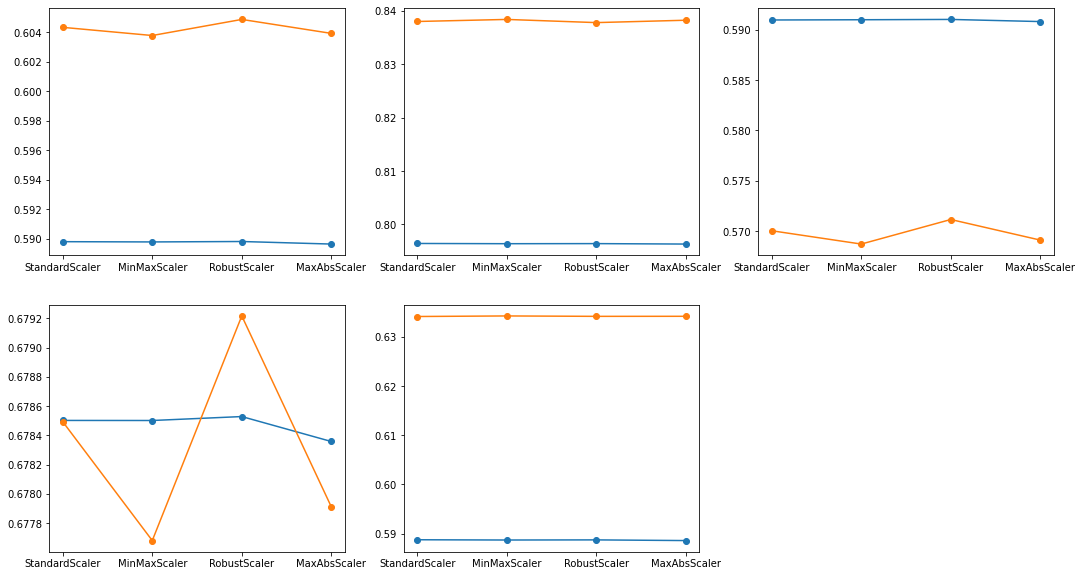

In [ ]:
# Initialize the plot
plt.figure(figsize=(18, 10))

# Plot metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
dt_metrics_list = [dt_accuracies, dt_precisions, dt_recalls, dt_f1_scores, dt_roc_aucs]
lr_metrics_list = [accuracies, precisions, recalls, f1_scores, roc_aucs]

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.plot(scaler_names, dt_metrics_list[i], marker='o', label='Decision Tree')
    plt.plot(scaler_names, lr_metrics_list[i], marker='o', label='Logistic Regression')

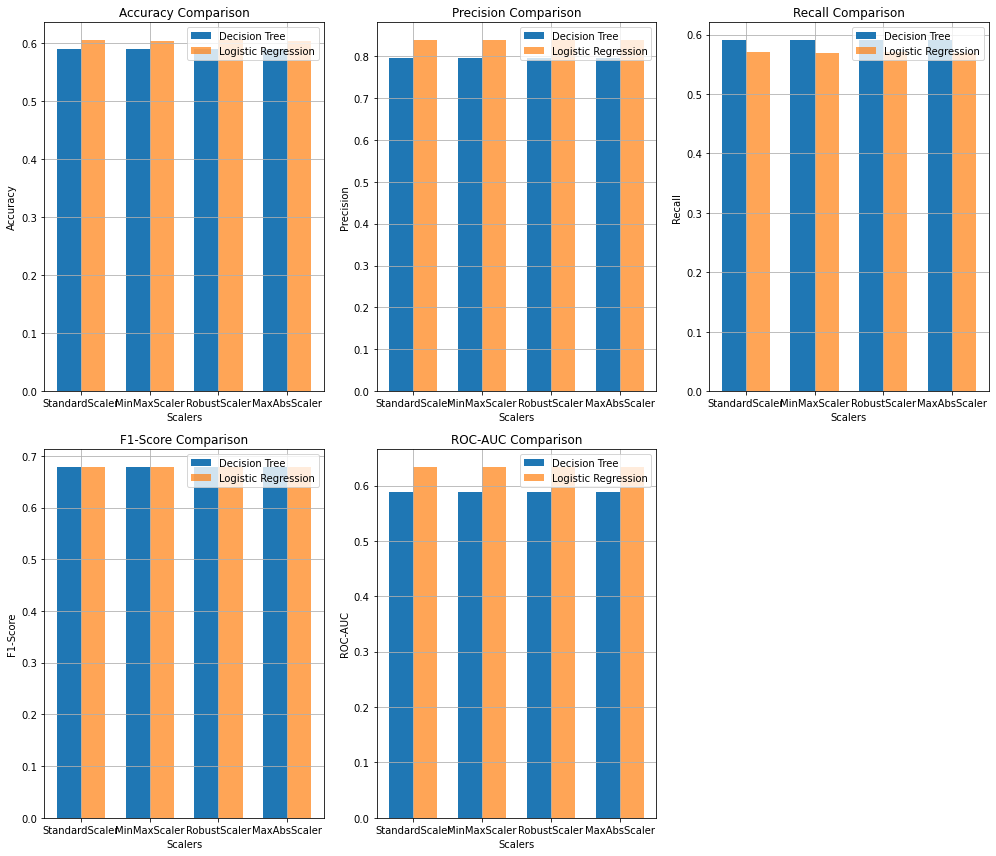

In [ ]:
#  Metrics collected for each scaler for both models
metrics = {
    'Accuracy': (dt_accuracies, accuracies),
    'Precision': (dt_precisions, precisions),
    'Recall': (dt_recalls, recalls),
    'F1-Score': (dt_f1_scores, f1_scores),
    'ROC-AUC': (dt_roc_aucs, roc_aucs)
}

# Number of scalers and metrics
n_scalers = len(scaler_names)
n_metrics = len(metrics)  # Calculate the number of metrics

# Set a reasonable default layout (2 rows for 5 metrics or less)
rows = min(2, n_metrics)  # Ensure at most 2 rows
cols = int(np.ceil(n_metrics / rows))  # Adjust columns based on rows

# Set the bar width and the positions
bar_width = 0.35
index = np.arange(n_scalers)

# Create subplots for each metric
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 12))
axes = axes.flatten()

for i, (metric_name, (dt_values, lr_values)) in enumerate(metrics.items()):
    ax = axes[i]
    
    # Plot bars for Decision Tree and Logistic Regression
    ax.bar(index, dt_values, bar_width, label='Decision Tree')
    ax.bar(index + bar_width, lr_values, bar_width, label='Logistic Regression', alpha=0.7)
    
    # Set the labels and title
    ax.set_xlabel('Scalers')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} Comparison')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(scaler_names)
    ax.legend(loc='upper right')
    ax.grid(True)

# Hide the extra subplot
axes[-1].axis('off')  # Turn off ticks and labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

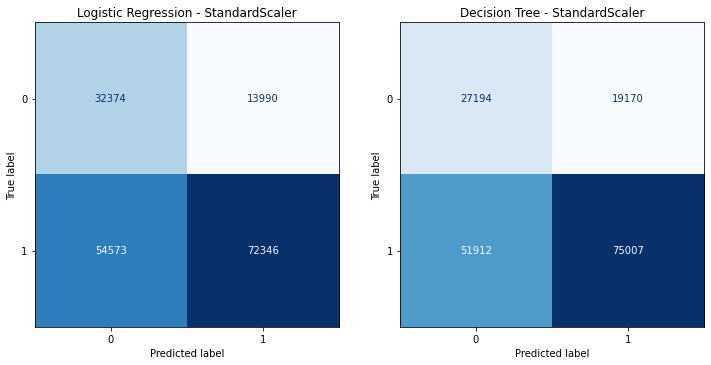

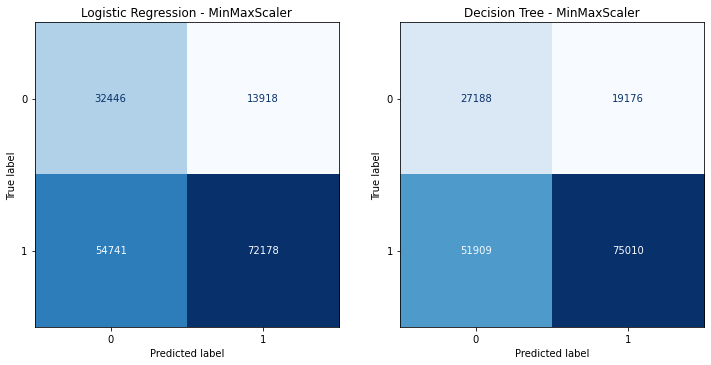

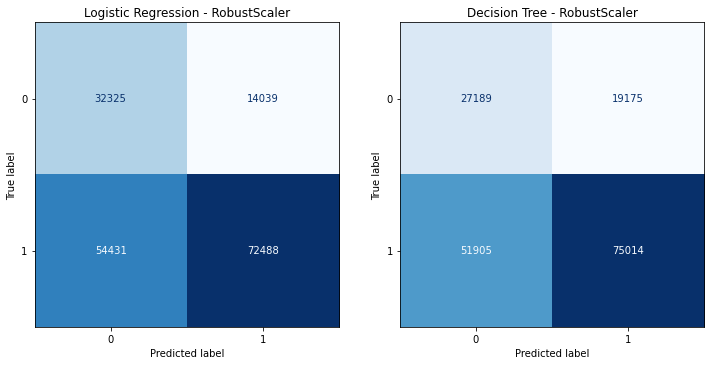

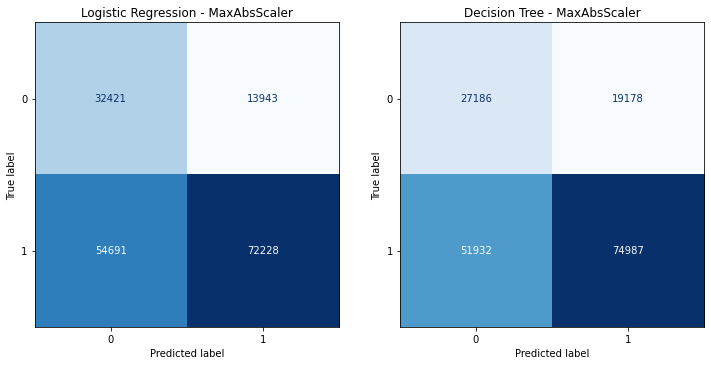

In [ ]:
# Define the function to plot confusion matrices side by side
def plot_confusion_matrices_side_by_side(model1_name, model2_name, scaler_name, y_true, y_pred1, y_pred2):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Confusion Matrix for Model 1
    cm1 = confusion_matrix(y_true, y_pred1)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
    disp1.plot(cmap=plt.cm.Blues, ax=ax[0], colorbar=False)
    ax[0].set_title(f'{model1_name} - {scaler_name}')
    
    # Confusion Matrix for Model 2
    cm2 = confusion_matrix(y_true, y_pred2)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
    disp2.plot(cmap=plt.cm.Blues, ax=ax[1], colorbar=False)
    ax[1].set_title(f'{model2_name} - {scaler_name}')
    
    plt.show()

# Iterate through each scaler
for scaler_name in scalers:
    # Logistic Regression
    pipeline_lr = create_pipeline(scaler_name, baseline_model)
    pipeline_lr.fit(X_train_cat_encoded, y_train)
    predictions_lr = pipeline_lr.predict(X_test_cat_encoded)
    
    # Decision Tree
    pipeline_dt = create_pipeline(scaler_name, dt_model)
    pipeline_dt.fit(X_train_cat_encoded, y_train)
    predictions_dt = pipeline_dt.predict(X_test_cat_encoded)
    
    # Plot confusion matrices side by side
    plot_confusion_matrices_side_by_side('Logistic Regression', 'Decision Tree', scaler_name, y_test, predictions_lr, predictions_dt)

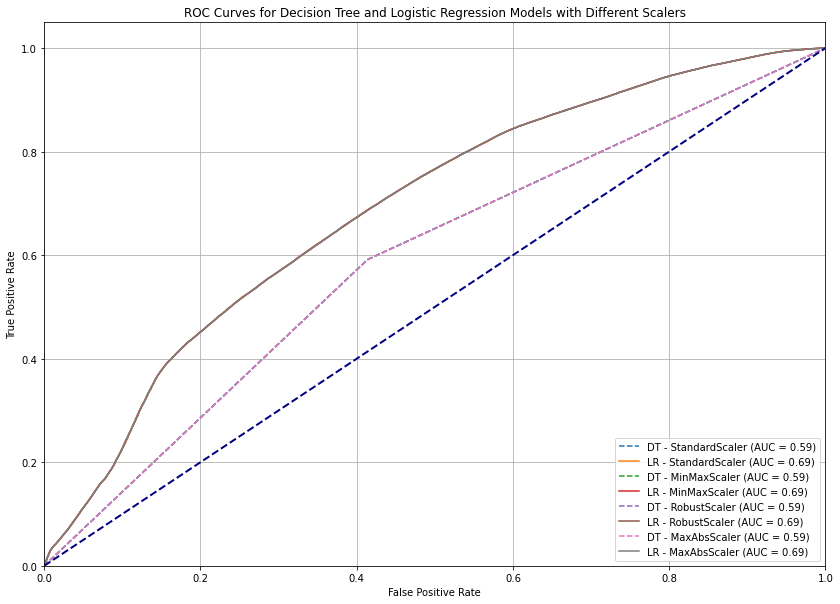

In [ ]:
# Initialize the plot
plt.figure(figsize=(14, 10))

# Iterate through each scaler to calculate and plot ROC curves
for i, scaler_name in enumerate(scaler_names):
    # Decision Tree Model
    pipeline_dt = create_pipeline(scaler_name, dt_model)
    pipeline_dt.fit(X_train_cat_encoded, y_train)
    y_score_dt = pipeline_dt.predict_proba(X_test_cat_encoded)[:, 1]
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    
    # Logistic Regression Model
    pipeline_lr = create_pipeline(scaler_name, baseline_model)
    pipeline_lr.fit(X_train_cat_encoded, y_train)
    y_score_lr = pipeline_lr.predict_proba(X_test_cat_encoded)[:, 1]
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    # Plot Decision Tree ROC curve
    plt.plot(fpr_dt, tpr_dt, label=f'DT - {scaler_name} (AUC = {roc_auc_dt:.2f})', linestyle='--')
    
    # Plot Logistic Regression ROC curve
    plt.plot(fpr_lr, tpr_lr, label=f'LR - {scaler_name} (AUC = {roc_auc_lr:.2f})')

# Plot the diagonal line (no-skill classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree and Logistic Regression Models with Different Scalers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Logistic Regression Evaluation

+ The model correctly predicted the outcome for over  60% of the instances in the test set using the different scalers to evaluate.
+ Of all the instances that the model had a precision  for the positive class (1: 'INJURY AND / OR TOW DUE TO CRASH'), above 80% using the various scalers.
+ Low recall as model correctly identified at about 56% of all actual positive instances. This indicates that the model misses about 44% of the true positive cases,
+ 67% is the trade-off between precision and recall in all model instances 
+ the model has a modest score of 63.42% for the ROC-AUC, which indicates low discriminative power
+ High number of false negatives over 54000, meaning it is missing many positive cases. This contributes to the lower recall value.

## Decision Tree Evaluation

+ The model correctly predicted the outcome for below 60% of the instances in the test set using the different scalers to evaluate.
+ Of all the instances that the model had a precision  for the positive class (1: 'INJURY AND / OR TOW DUE TO CRASH'), below 80% using the various scalers.
+ Low recall as model correctly identified at about 59% of all actual positive instances. This indicates that the model misses about 41% of the true positive cases, higher than logistic regression
+ 67% is the trade-off between precision and recall in all model instances similar to logistic regression model 
+ the model like logistic has a lower modest score approximatly 58.87% for the ROC-AUC, which indicates low discriminative power
+ High number of false negatives over 51000, though lower than logistc regression model, means it is missing many positive cases. This contributes to the lower recall value.

## Conclusions

## Questions to consider:
***
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

### Overall Model Performance:

    `Logistic Regression` slightly outperformed the `Decision Tree` in terms of accuracy, precision, and ROC-AUC. However, both models have relatively low recall, which indicates they miss a significant number of true positive cases (i.e., severe crashes).
    The Decision Tree model has a lower overall performance compared to the Logistic Regression, especially in terms of precision and ROC-AUC. However, it had fewer false negatives than Logistic Regression, indicating it might slightly better capture severe crashes, although this comes at the cost of overall predictive accuracy.
### Trade-off Between Precision and Recall:

    Both models have similar F1-scores (~0.67), suggesting a balance between precision and recall. However, the recall is notably low for both models, which is concerning given the context of the problem (i.e., identifying severe crashes is crucial for insurance underwriting).

    The models' ability to correctly classify severe crashes is inadequate, as reflected by the high number of false negatives. This means that in many cases where a crash is severe, the models fail to predict it correctly, which could result in underestimating the risk for certain claims.

### Model Discriminative Power:

    The ROC-AUC scores for both models (Logistic Regression: ~63.42%, Decision Tree: ~58.87%) suggest that neither model is particularly strong at distinguishing between severe and non-severe crashes. The discriminative power of the models is relatively modest, indicating that more sophisticated models or additional data/features might be needed to improve prediction performance

## Recomendations

**Feature Engineering**: Explore creating new features or transforming existing ones to capture more relevant information.

**Hyperparameter Tuning**: Fine-tune the hyperparameters of both models to optimize their performance.

**Ensemble Methods**: Combine multiple models (e.g., using random forests or gradient boosting) to potentially improve overall performance and reduce overfitting.

**Consider Other Models**: Experiment with other machine learning algorithms that might be better suited to your specific problem.

**Domain Expertise**: Leverage insights from insurance experts to identify additional factors that might influence crash severity.

**Cross-Validation**:Use cross-validation techniques to ensure that the model performance observed is generalizable and not due to specificities in the train-test split. This will give a better estimate of model performance across different data subsets.

 ## Next Steps

**Data Quality**: Ensure the quality and completeness of your data to avoid biases in your analysis. Using other datasets analyze features that would increase model efficiency

**Cost-Sensitive Learning**:Given the high cost of missing severe crashes, explore cost-sensitive learning approaches where the model penalizes false negatives more heavily. This could help improve the recall for severe crashes, which is critical for the business problem.